In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [292]:
fLeases = '/Users/caterinaponti/Desktop/DataFest/2025 ASA DataFest-update2-2025-03-19/Leases.csv'
fMarket = '/Users/caterinaponti/Desktop/DataFest/2025 ASA DataFest-update2-2025-03-19/Major Market Occupancy Data-revised.csv'
fPrice = '/Users/caterinaponti/Desktop/DataFest/2025 ASA DataFest-update2-2025-03-19/Price and Availability Data.csv'
fUnemployement = '/Users/caterinaponti/Desktop/DataFest/2025 ASA DataFest-update2-2025-03-19/Unemployment.csv'

In [293]:
dfMarket = pd.read_csv(fMarket)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/caterinaponti/Desktop/DataFest/2025 ASA DataFest-update2-2025-03-19/Major Market Occupancy Data-revised.csv'

In [294]:
dfMarket.head()

,year,quarter,market,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion
0,2020,Q1,Washington D.C.,0.19,0.98,0.785714
1,2020,Q1,Manhattan,0.08,0.98,0.732857
2,2020,Q1,Chicago,0.14,0.99,0.788571
3,2020,Q1,Houston,0.33,0.99,0.835714
4,2020,Q1,Philadelphia,0.20,0.99,0.817143


In [295]:
dfMarket.columns

Index(['year', 'quarter', 'market', 'ending_occupancy_proportion',
       'starting_occupancy_proportion', 'avg_occupancy_proportion'],
      dtype='object')

In [296]:
dfLeases = pd.read_csv(fLeases)

In [297]:
dfLeases.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [298]:
dfPrice = pd.read_csv(fPrice)

In [299]:
dfPrice.head()

,year,quarter,market,internal_class,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,Atlanta,A,101140416,20239067,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126
1,2018,Q1,Atlanta,O,65810449,12728989,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742
2,2018,Q1,Austin,A,36815073,4281986,0.116311,40.384706,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1738905
3,2018,Q1,Austin,O,27947525,3360936,0.121082,30.118658,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185674
4,2018,Q1,Baltimore,A,41033288,6813380,0.166045,27.104835,22.954034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380750


In [300]:
dfUnemployement = pd.read_csv(fUnemployement)

In [301]:
dfUnemployement.head()

,year,quarter,month,state,unemployment_rate
0,2018,Q1,1,AZ,4.9
1,2018,Q1,1,CA,4.4
2,2018,Q1,1,CO,2.9
3,2018,Q1,1,DE,4.1
4,2018,Q1,1,DC,5.9


In [302]:
dfLeases.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing'],
      dtype='object')

In [303]:
dfLeases['RBA']

0         101140416.0
1         101140416.0
2         101140416.0
3          65810449.0
4         101140416.0
             ...     
194680     25106444.0
194681     25106444.0
194682     29139850.0
194683     25106444.0
194684     29139850.0
Name: RBA, Length: 194685, dtype: float64

In [304]:
dfLeases['availability_proportion']

0         0.200109
1         0.200109
2         0.200109
3         0.193419
4         0.200109
            ...   
194680    0.230000
194681    0.230000
194682    0.168000
194683    0.230000
194684    0.168000
Name: availability_proportion, Length: 194685, dtype: float64

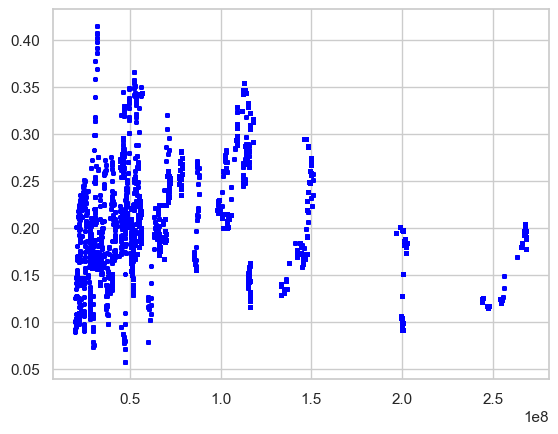

In [305]:
plt.scatter(dfLeases['RBA'], dfLeases['availability_proportion'], s=5, c='blue', marker='o', alpha=0.7)


In [306]:
dfLeases['availability_proportion'].mean()

0.20512900743126875

In [307]:
dfLeases[dfLeases['internal_class'] == 'A']['availability_proportion'].mean()

0.22453931210725847

In [308]:
dfLeases[dfLeases['internal_class'] == 'O']['availability_proportion'].mean()

0.1908370006275966

In [309]:
dfLeases['leasing']

0         1205126.0
1         1205126.0
2         1205126.0
3          715742.0
4         1205126.0
            ...    
194680     770384.0
194681     770384.0
194682     328947.0
194683     770384.0
194684     328947.0
Name: leasing, Length: 194685, dtype: float64

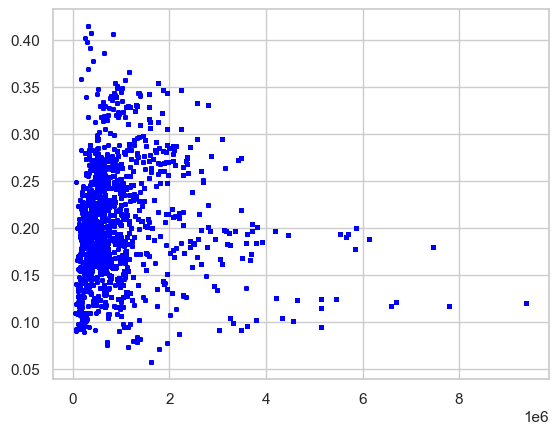

In [310]:
plt.scatter(dfLeases['leasing'], dfLeases['availability_proportion'], s=5, c='blue', marker='o', alpha=0.7)


In [311]:
dfLeases['market'].unique()

array(['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago',
       'Chicago Suburbs', 'Dallas/Ft Worth', 'Denver', 'Detroit',
       'Houston', 'Los Angeles', 'Manhattan', 'Nashville',
       'Northern New Jersey', 'Northern Virginia', 'Orange County',
       'Philadelphia', 'Phoenix', 'Raleigh/Durham', 'Salt Lake City',
       'San Diego', 'San Francisco', 'Seattle', 'South Bay/San Jose',
       'South Florida', 'Southern Maryland', 'Tampa', 'Washington D.C.'],
      dtype=object)

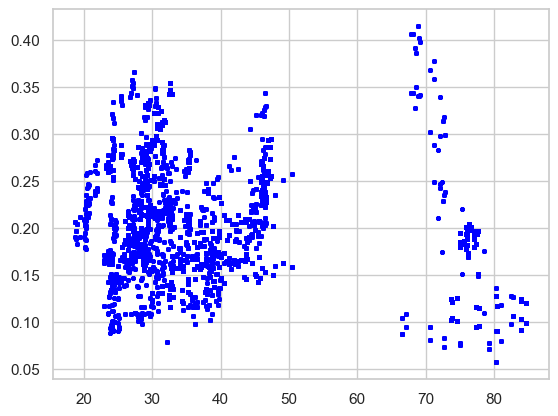

In [312]:
plt.scatter(dfLeases['overall_rent'], dfLeases['availability_proportion'], s=5, c='blue', marker='o', alpha=0.7)


In [313]:
dfMarket.columns

Index(['year', 'quarter', 'market', 'ending_occupancy_proportion',
       'starting_occupancy_proportion', 'avg_occupancy_proportion'],
      dtype='object')

In [314]:
grouped_df = dfMarket.groupby(['market', 'year'])['avg_occupancy_proportion'].mean().reset_index()

<Axes: xlabel='year', ylabel='avg_occupancy_proportion'>

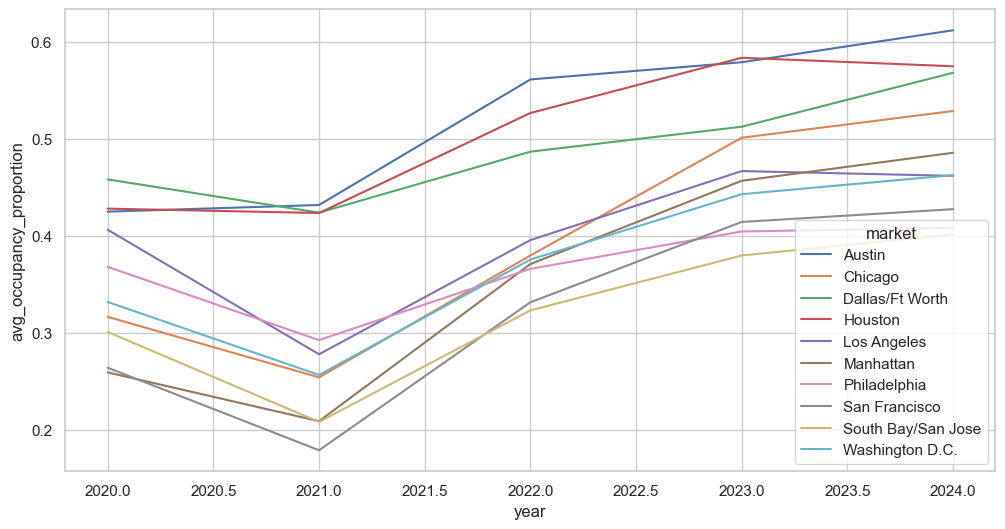

In [315]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped_df,
    x='year',
    y='avg_occupancy_proportion',
    hue='market',
    markers=True,
    dashes=False
)

In [316]:
# Count how many of each internal_class per market
class_counts = dfLeases.groupby(['market', 'internal_class']).size().reset_index(name='count')


In [317]:
class_counts

,market,internal_class,count
0,Atlanta,A,4136
1,Atlanta,O,3603
2,Austin,A,2179
3,Austin,O,2818
4,Baltimore,A,1668
5,Baltimore,O,2289
6,Boston,A,3443
7,Boston,O,4793
8,Charlotte,A,1467
9,Charlotte,O,1896


In [318]:
class_pivot = class_counts.pivot(index='market', columns='internal_class', values='count').fillna(0)
class_pivot

internal_class,A,O
market,,
Atlanta,4136,3603
Austin,2179,2818
Baltimore,1668,2289
Boston,3443,4793
Charlotte,1467,1896
Chicago,1675,3465
Chicago Suburbs,2426,3804
Dallas/Ft Worth,6029,9237
Denver,2898,6059


In [319]:
class_pivot['total'] = class_pivot.sum(axis=1)
class_pivot['perc_A'] = class_pivot['A'] / class_pivot['total']
class_pivot['perc_O'] = class_pivot['O'] / class_pivot['total']

In [320]:
copyLeases = dfLeases.copy()

In [321]:
# Merge with your grouped_df from before
merged = copyLeases.merge(class_pivot[['perc_A', 'perc_O']], on='market', how='left')


/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/1643269965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='market', ylabel='perc_A'>

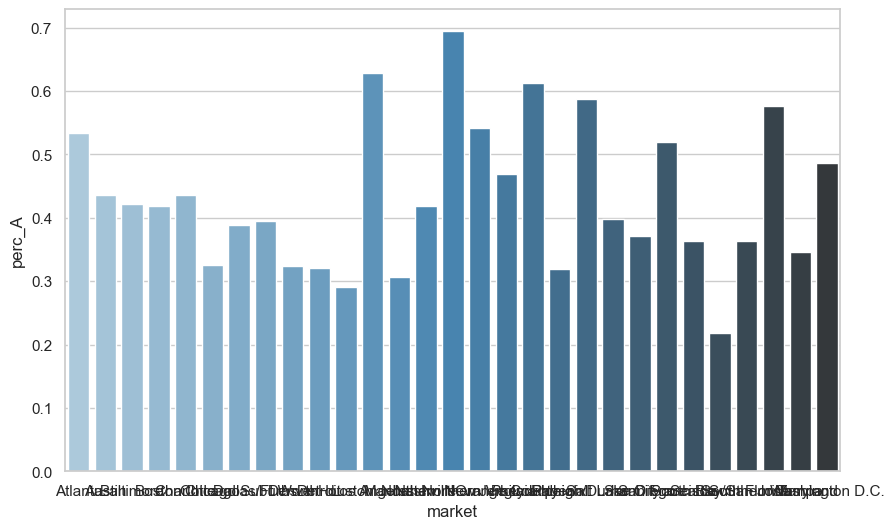

In [322]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=class_pivot.reset_index(),
    x='market',
    y='perc_A',
    palette='Blues_d'
)

In [323]:
grouped_Market = dfLeases.groupby(['market', 'internal_class', 'year', 'quarter'])['availability_proportion'].mean()

In [324]:
grouped_Market

market           internal_class  year  quarter
Atlanta          A               2018  Q1         0.200109
                                       Q2         0.207187
                                       Q3         0.214226
                                       Q4         0.200101
                                 2019  Q1         0.203462
                                                    ...   
Washington D.C.  O               2023  Q4              NaN
                                 2024  Q1              NaN
                                       Q2              NaN
                                       Q3              NaN
                                       Q4              NaN
Name: availability_proportion, Length: 1624, dtype: float64

In [325]:
grouped_Market.items

<bound method Series.items of market           internal_class  year  quarter
Atlanta          A               2018  Q1         0.200109
                                       Q2         0.207187
                                       Q3         0.214226
                                       Q4         0.200101
                                 2019  Q1         0.203462
                                                    ...   
Washington D.C.  O               2023  Q4              NaN
                                 2024  Q1              NaN
                                       Q2              NaN
                                       Q3              NaN
                                       Q4              NaN
Name: availability_proportion, Length: 1624, dtype: float64>

In [326]:
greaterLeases = dfLeases[dfLeases['leasedSF'] > 10000]
greaterLeases

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
6,2018,Q1,1.0,Atlanta,2 Sun,Atlanta_Northeast_Peachtree Corners_2 Sun_2 Su...,2 Sun Ct,South,Peachtree Corners,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
9,2018,Q1,1.0,Atlanta,271 17th,Atlanta_Midtown_Atlanta_271 17th_271 17th St NW,271 17th St NW,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
12,2018,Q1,1.0,Atlanta,500 Northpark,Atlanta_Central Perimeter_Atlanta_500 Northpar...,1100 Abernathy Rd NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
14,2018,Q1,1.0,Atlanta,Bank of America Plaza,Atlanta_Downtown_Atlanta_Bank of America Plaza...,600 Peachtree St NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194677,2024,Q4,12.0,Southern Maryland,Woodmont Office Center,Southern Maryland_Rockville_Rockville_Woodmont...,1401 Rockville Pike,Northeast,Rockville,MD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194679,2024,Q4,12.0,Tampa,Building II,Tampa_Westshore_Tampa_Building II_3111 W Dr Ma...,3111 W Dr Martin Luther King Blvd,South,Tampa,FL,...,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0
194680,2024,Q4,12.0,Tampa,Building II,Tampa_Westshore_Tampa_Building II_3111 W Dr Ma...,3111 W Dr Martin Luther King Blvd,South,Tampa,FL,...,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0
194681,2024,Q4,12.0,Tampa,Midtown East,Tampa_Westshore_Tampa_Midtown East_1 Midtown Pl,1 Midtown Pl,South,Tampa,FL,...,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0


In [327]:
grouped_Market = greaterLeases.groupby(['market', 'internal_class', 'year', 'quarter'])['availability_proportion'].mean()

In [328]:
greaterLeases['internal_industry'].unique()

array(['Financial Services and Insurance',
       'Construction, Engineering and Architecture',
       'Technology, Advertising, Media, and Information', nan,
       'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
       'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
       'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
       'Education', 'Legal Services', 'Personal Services and Recreation',
       'Real Estate (except coworking providers)',
       'Coworking and Executive Suite Companies', 'Transportation',
       'Government', 'TBD', 'Energy & Utilities', 'Healthcare', 'Retail',
       'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
       'Unclassifiable', 'Pharmaceuticals'], dtype=object)

In [329]:
dfFinance = greaterLeases[greaterLeases['internal_industry'] == 'Financial Services and Insurance']

In [330]:
dfTech = greaterLeases[greaterLeases['internal_industry'] == 'Technology, Advertising, Media, and Information']

In [331]:
dfLegal = greaterLeases[greaterLeases['internal_industry'] == 'Legal Services']

In [332]:
# Step 1: Replace 'Q1' -> 1, etc.
quarter_map = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
greaterLeases['quarter_num'] = greaterLeases['quarter'].map(quarter_map)

# Step 2: Compute a continuous quarter index (for ordering)
greaterLeases['quarter_index'] = (greaterLeases['year'] - 2019) * 4 + (greaterLeases['quarter_num'] - 1)

# Step 3: Group and average
grouped = greaterLeases.groupby(
    ['market', 'internal_class', 'year', 'quarter', 'quarter_index']
)['availability_proportion'].mean().reset_index()

# Step 4: Sort and group
grouped = grouped.sort_values(['market', 'internal_class', 'quarter_index'])
grouped_by = grouped.groupby(['market', 'internal_class'])

# Step 5: Iterate and calculate diffs
results = []

for (market, internal_class), group in grouped_by:
    group = group.reset_index(drop=True)
    
    for i in range(1, len(group)):
        current = group.loc[i]
        previous = group.loc[i - 1]

        results.append({
            'market': market,
            'internal_class': internal_class,
            'current_year': current['year'],
            'current_quarter': current['quarter'],
            'previous_year': previous['year'],
            'previous_quarter': previous['quarter'],
            'current_avail': current['availability_proportion'],
            'previous_avail': previous['availability_proportion'],
            'availability_diff': current['availability_proportion'] - previous['availability_proportion'],
            'time_index': f"{current['year']}{current['quarter']} - {previous['year']}{previous['quarter']}"
        })

# Step 6: Combine results
diff_df = pd.DataFrame(results)

# Preview
diff_df.head()

/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/2773671447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greaterLeases['quarter_num'] = greaterLeases['quarter'].map(quarter_map)
/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/2773671447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greaterLeases['quarter_index'] = (greaterLeases['year'] - 2019) * 4 + (greaterLeases['quarter_num'] - 1)


,market,internal_class,current_year,current_quarter,previous_year,previous_quarter,current_avail,previous_avail,availability_diff,time_index
0,Atlanta,A,2018,Q2,2018,Q1,0.207187,0.200109,0.007078,2018Q2 - 2018Q1
1,Atlanta,A,2018,Q3,2018,Q2,0.214226,0.207187,0.007039,2018Q3 - 2018Q2
2,Atlanta,A,2018,Q4,2018,Q3,0.200101,0.214226,-0.014125,2018Q4 - 2018Q3
3,Atlanta,A,2019,Q1,2018,Q4,0.203462,0.200101,0.003362,2019Q1 - 2018Q4
4,Atlanta,A,2019,Q2,2019,Q1,0.200904,0.203462,-0.002558,2019Q2 - 2019Q1


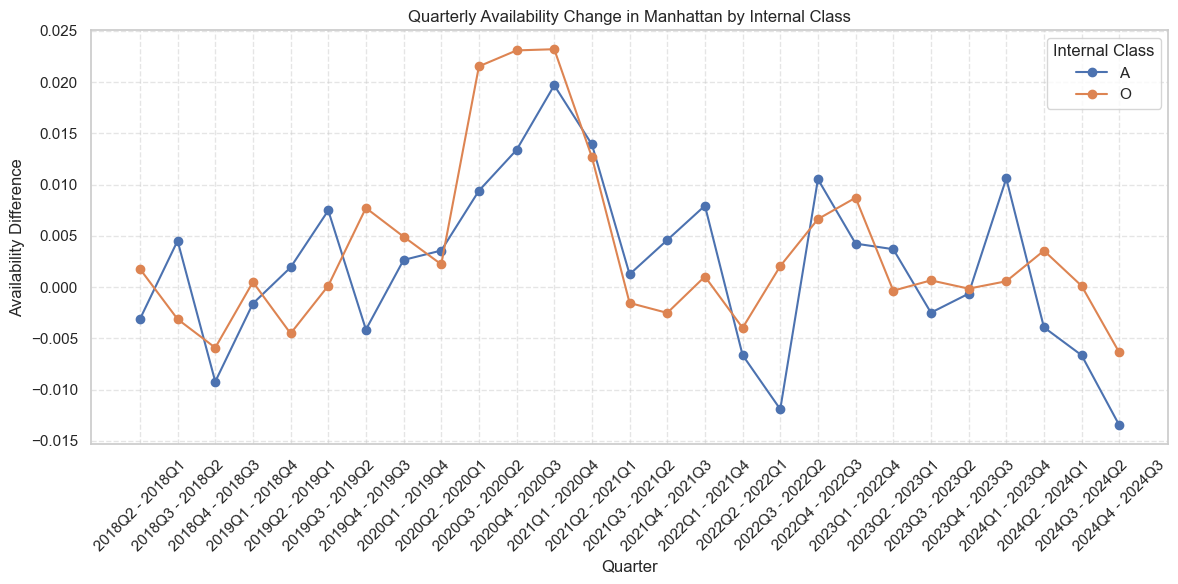

In [333]:
import matplotlib.pyplot as plt

# Step 1: Filter for Manhattan only
manhattan_df = diff_df[diff_df['market'].str.lower() == 'manhattan']

# Optional: sort by time_index (in case it's out of order)
manhattan_df = manhattan_df.sort_values(by=['current_year', 'current_quarter'])

# Step 2: Plot
plt.figure(figsize=(12, 6))
for cls in manhattan_df['internal_class'].unique():
    class_data = manhattan_df[manhattan_df['internal_class'] == cls]
    plt.plot(class_data['time_index'], class_data['availability_diff'], marker='o', label=cls)

plt.title("Quarterly Availability Change in Manhattan by Internal Class")
plt.xlabel("Quarter")
plt.ylabel("Availability Difference")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Internal Class')
plt.tight_layout()
plt.show()


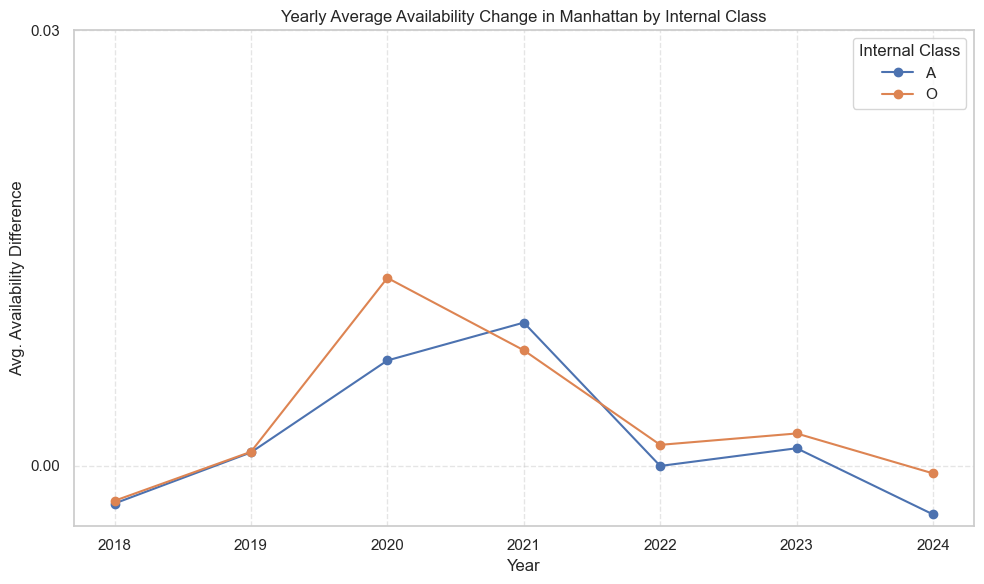

In [334]:


# Step 1: Filter for Manhattan
manhattan_df = diff_df[diff_df['market'].str.lower() == 'manhattan']

# Step 2: Group by year and internal_class, average the availability_diff
yearly_diff = (
    manhattan_df
    .groupby(['current_year', 'internal_class'])['availability_diff']
    .mean()
    .reset_index()
)

# Step 3: Plot
plt.figure(figsize=(10, 6))

for cls in yearly_diff['internal_class'].unique():
    class_data = yearly_diff[yearly_diff['internal_class'] == cls]
    plt.plot(class_data['current_year'], class_data['availability_diff'], marker='o', label=cls)

plt.title("Yearly Average Availability Change in Manhattan by Internal Class")
plt.xlabel("Year")
plt.ylabel("Avg. Availability Difference")
plt.xticks(yearly_diff['current_year'].unique())  # One tick per year
plt.yticks([0, 0.030])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Internal Class')
plt.tight_layout()
plt.show()


In [335]:
manhattan_df = diff_df[diff_df['market'].str.lower() == 'manhattan']

In [336]:
dfUnemployement

,year,quarter,month,state,unemployment_rate
0,2018,Q1,1,AZ,4.9
1,2018,Q1,1,CA,4.4
2,2018,Q1,1,CO,2.9
3,2018,Q1,1,DE,4.1
4,2018,Q1,1,DC,5.9
...,...,...,...,...,...
1843,2024,Q4,12,TN,3.6
1844,2024,Q4,12,TX,4.2
1845,2024,Q4,12,UT,3.5
1846,2024,Q4,12,VA,3.0


In [337]:
dfUnemployement.head()

,year,quarter,month,state,unemployment_rate
0,2018,Q1,1,AZ,4.9
1,2018,Q1,1,CA,4.4
2,2018,Q1,1,CO,2.9
3,2018,Q1,1,DE,4.1
4,2018,Q1,1,DC,5.9


In [338]:
states = greaterLeases['state'].unique()
states

array(['GA', 'TX', 'MD', 'MA', 'NH', 'NC', 'IL', 'CO', 'MI', 'CA', 'NY',
       'TN', 'NJ', 'VA', 'PA', 'DE', 'AZ', 'UT', 'WA', 'FL', 'DC', 'SC'],
      dtype=object)

In [339]:
merged_df = pd.merge(
    greaterLeases, 
    dfUnemployement, 
    on=['state', 'year', 'quarter'], 
    how='inner'  # 'inner' will only keep rows with matching values in both datasets
)

In [340]:
merged_df.shape

(88866, 39)

In [341]:
diff_df.columns

Index(['market', 'internal_class', 'current_year', 'current_quarter',
       'previous_year', 'previous_quarter', 'current_avail', 'previous_avail',
       'availability_diff', 'time_index'],
      dtype='object')

In [342]:
dfLeases.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing'],
      dtype='object')

In [343]:
rents = greaterLeases[['market', 'year', 'quarter', 'leasing', 'overall_rent']]

In [344]:
rents

,market,year,quarter,leasing,overall_rent
0,Atlanta,2018,Q1,1205126.0,24.345689
6,Atlanta,2018,Q1,1205126.0,24.345689
9,Atlanta,2018,Q1,1205126.0,24.345689
12,Atlanta,2018,Q1,1205126.0,24.345689
14,Atlanta,2018,Q1,1205126.0,24.345689
...,...,...,...,...,...
194677,Southern Maryland,2024,Q4,NaN,NaN
194679,Tampa,2024,Q4,770384.0,29.460000
194680,Tampa,2024,Q4,770384.0,29.460000
194681,Tampa,2024,Q4,770384.0,29.460000


In [345]:
grouped = greaterLeases.groupby(
    ['market', 'internal_class', 'year', 'quarter']
)['availability_proportion'].mean().reset_index()

grouped

,market,internal_class,year,quarter,availability_proportion
0,Atlanta,A,2018,Q1,0.200109
1,Atlanta,A,2018,Q2,0.207187
2,Atlanta,A,2018,Q3,0.214226
3,Atlanta,A,2018,Q4,0.200101
4,Atlanta,A,2019,Q1,0.203462
...,...,...,...,...,...
1612,Washington D.C.,O,2023,Q4,NaN
1613,Washington D.C.,O,2024,Q1,NaN
1614,Washington D.C.,O,2024,Q2,NaN
1615,Washington D.C.,O,2024,Q3,NaN


In [346]:
merged_df = pd.merge(
    rents,  # DataFrame 1
    grouped,  # DataFrame 2
    on=['market', 'year', 'quarter'],  # Common columns
    how='inner'  # 'inner' merge keeps only rows with matching values in both DataFrames
)

In [347]:
# Group the new dataset by 'market' and 'internal_class'
grouped_by_new = merged_df.groupby(['market', 'internal_class'])

# Initialize a list to store the results
results_new = []

# Iterate over each group in the grouped dataset
for (market, internal_class), group in grouped_by_new:
    group = group.reset_index(drop=True)
    
    # Loop through the rows in the group to calculate the differences
    for i in range(1, len(group)):
        current = group.loc[i]
        previous = group.loc[i - 1]

        # Append the results for each comparison, keeping relevant columns
        results_new.append({
            'market': market,
            'internal_class': internal_class,
            'current_year': current['year'],
            'current_quarter': current['quarter'],
            'previous_year': previous['year'],
            'previous_quarter': previous['quarter'],
            'current_avail': current['availability_proportion'],
            'previous_avail': previous['availability_proportion'],
            'availability_diff': current['availability_proportion'] - previous['availability_proportion'],
            'time_index': f"{current['year']}{current['quarter']} - {previous['year']}{previous['quarter']}",
            'current_leasing': current['leasing'],  # Retaining 'leasing' column
            'previous_leasing': previous['leasing'],  # Retaining 'leasing' column
            'current_overall_rent': current['overall_rent'],  # Retaining 'overall_rent' column
            'previous_overall_rent': previous['overall_rent']  # Retaining 'overall_rent' column
        })

# Combine the results into a DataFrame
diff_df_new = pd.DataFrame(results_new)

# Preview the resulting DataFrame
diff_df_new.head()


,market,internal_class,current_year,current_quarter,previous_year,previous_quarter,current_avail,previous_avail,availability_diff,time_index,current_leasing,previous_leasing,current_overall_rent,previous_overall_rent
0,Atlanta,A,2018,Q1,2018,Q1,0.200109,0.200109,0.0,2018Q1 - 2018Q1,1205126.0,1205126.0,24.345689,24.345689
1,Atlanta,A,2018,Q1,2018,Q1,0.200109,0.200109,0.0,2018Q1 - 2018Q1,1205126.0,1205126.0,24.345689,24.345689
2,Atlanta,A,2018,Q1,2018,Q1,0.200109,0.200109,0.0,2018Q1 - 2018Q1,1205126.0,1205126.0,24.345689,24.345689
3,Atlanta,A,2018,Q1,2018,Q1,0.200109,0.200109,0.0,2018Q1 - 2018Q1,1205126.0,1205126.0,24.345689,24.345689
4,Atlanta,A,2018,Q1,2018,Q1,0.200109,0.200109,0.0,2018Q1 - 2018Q1,1205126.0,1205126.0,24.345689,24.345689


In [348]:
diff_df_new.columns

Index(['market', 'internal_class', 'current_year', 'current_quarter',
       'previous_year', 'previous_quarter', 'current_avail', 'previous_avail',
       'availability_diff', 'time_index', 'current_leasing',
       'previous_leasing', 'current_overall_rent', 'previous_overall_rent'],
      dtype='object')

In [349]:
greaterLeases.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing',
       'quarter_num', 'quarter_index'],
      dtype='object')

In [350]:
leases_df = dfLeases[dfLeases.leasedSF > 10000]
leases_df = dfLeases[dfLeases.internal_industry.isin(["Financial Services and Insurance", "Technology, Advertising, Media, and Information","Legal Services"])]


In [351]:
leases_df

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
9,2018,Q1,1.0,Atlanta,271 17th,Atlanta_Midtown_Atlanta_271 17th_271 17th St NW,271 17th St NW,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
14,2018,Q1,1.0,Atlanta,Bank of America Plaza,Atlanta_Downtown_Atlanta_Bank of America Plaza...,600 Peachtree St NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
68,2018,Q1,1.0,Atlanta,Terminus 100,Atlanta_Buckhead_Atlanta_Terminus 100_3280 Pea...,3280 Peachtree Rd NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
82,2018,Q1,1.0,Atlanta,NaN,Atlanta_Midtown_Atlanta_NA_10 10th St,10 10th St,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194678,2024,Q4,12.0,Tampa,Arcos Office Bldg,Tampa_Tampa CBD_Tampa_Arcos Office Bldg_501 E ...,501 E Jackson St,South,Tampa,FL,...,29.460000,3967413.0,0.0731,25.777557,29.801662,924341.0,0.0170,22.768426,24.797899,328947.0
194679,2024,Q4,12.0,Tampa,Building II,Tampa_Westshore_Tampa_Building II_3111 W Dr Ma...,3111 W Dr Martin Luther King Blvd,South,Tampa,FL,...,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0
194682,2024,Q4,12.0,Tampa,Park Tower,Tampa_Tampa CBD_Tampa_Park Tower_400 N Tampa St,400 N Tampa St,South,Tampa,FL,...,29.460000,3967413.0,0.0731,25.777557,29.801662,924341.0,0.0170,22.768426,24.797899,328947.0
194683,2024,Q4,12.0,Tampa,Rivergate Tower,Tampa_Tampa CBD_Tampa_Rivergate Tower_400 N As...,400 N Ashley Dr,South,Tampa,FL,...,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0


      market internal_class  year quarter time_index  difference  \
0    Atlanta              A  2018      Q2   2018-QQ2    0.007078   
1    Atlanta              A  2018      Q3   2018-QQ3    0.007039   
2    Atlanta              A  2018      Q4   2018-QQ4   -0.014125   
3    Atlanta              A  2019      Q1   2019-QQ1    0.003362   
4    Atlanta              A  2019      Q2   2019-QQ2   -0.002558   
..       ...            ...   ...     ...        ...         ...   
990    Tampa              O  2023      Q4   2023-QQ4   -0.004139   
991    Tampa              O  2024      Q1   2024-QQ1    0.001942   
992    Tampa              O  2024      Q2   2024-QQ2   -0.006875   
993    Tampa              O  2024      Q3   2024-QQ3    0.000134   
994    Tampa              O  2024      Q4   2024-QQ4    0.011186   

     availability_proportion  overall_rent  
0                   0.207187     26.067875  
1                   0.214226     26.393333  
2                   0.200101     26.488567  
3  

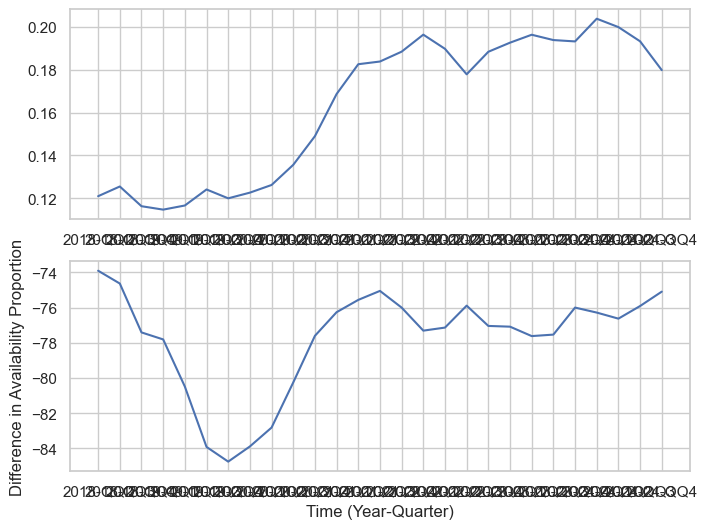

,market,internal_class,year,quarter,time_index,difference,availability_proportion,overall_rent
0,Atlanta,A,2018,Q2,2018-QQ2,0.007078,0.207187,26.067875
1,Atlanta,A,2018,Q3,2018-QQ3,0.007039,0.214226,26.393333
2,Atlanta,A,2018,Q4,2018-QQ4,-0.014125,0.200101,26.488567
3,Atlanta,A,2019,Q1,2019-QQ1,0.003362,0.203462,26.652200
4,Atlanta,A,2019,Q2,2019-QQ2,-0.002558,0.200904,26.905426


In [352]:
RBA = leases_df.dropna(subset=['availability_proportion'])

# Group the data by market, internal_class (O/A), year, and quarter
df_grouped = RBA.groupby(['market', 'internal_class', 'year', 'quarter']).agg({
    'availability_proportion': 'mean',
    'overall_rent' : 'mean'
}).reset_index()

# Sort the data to ensure proper order for calculating differences
df_grouped = df_grouped.sort_values(by=['market', 'internal_class', 'year', 'quarter'])

# Initialize an empty list to store the differences
differences = []

# Iterate over each market and internal_class (O/A)
for (market, internal_class), group in df_grouped.groupby(['market', 'internal_class']):
    group = group.reset_index(drop=True)  # Reset index for easier iteration
    for i in range(1, len(group)):  # Start from the second row to calculate differences
        diff = group.loc[i, 'availability_proportion'] - group.loc[i - 1, 'availability_proportion']
        differences.append({
            'market': market,
            'internal_class': internal_class,
            'year': group.loc[i, 'year'],
            'quarter': group.loc[i, 'quarter'],
            'time_index': f"{group.loc[i, 'year']}-Q{group.loc[i, 'quarter']}",  # Combine year and quarter
            'difference': diff,
            'availability_proportion': group.loc[i, 'availability_proportion'],
            'overall_rent': group.loc[i, 'overall_rent']

        })

# Convert the differences list into a DataFrame for easier analysis
differences_df = pd.DataFrame(differences)

# Set the 'time_index' as the index for easier plotting
#differences_df.set_index('time_index', inplace=True)

# Display the result
print(differences_df)


ready2graph = differences_df[(differences_df['market'] == 'Manhattan') & (differences_df['internal_class'] == 'A')]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6)) # 2 rows, 1 column

axes[0].plot(ready2graph.time_index, ready2graph.availability_proportion, label='Availability Proporiton')
axes[1].plot(ready2graph.time_index, -ready2graph.overall_rent, label='rent')

plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Difference in Availability Proportion')
plt.show()# Convert the differences list into a DataFrame for easier analysis
differences_df = pd.DataFrame(differences)

# Display the result
differences_df.head()

In [353]:
print(diff_df.head())

    market internal_class  current_year current_quarter  previous_year  \
0  Atlanta              A          2018              Q2           2018   
1  Atlanta              A          2018              Q3           2018   
2  Atlanta              A          2018              Q4           2018   
3  Atlanta              A          2019              Q1           2018   
4  Atlanta              A          2019              Q2           2019   

  previous_quarter  current_avail  previous_avail  availability_diff  \
0               Q1       0.207187        0.200109           0.007078   
1               Q2       0.214226        0.207187           0.007039   
2               Q3       0.200101        0.214226          -0.014125   
3               Q4       0.203462        0.200101           0.003362   
4               Q1       0.200904        0.203462          -0.002558   

        time_index  
0  2018Q2 - 2018Q1  
1  2018Q3 - 2018Q2  
2  2018Q4 - 2018Q3  
3  2019Q1 - 2018Q4  
4  2019Q2 - 2019Q

In [354]:
# Group by market and internal_class to get the average availability change
market_trends = diff_df.groupby(['market', 'internal_class'])['availability_diff'].mean().reset_index()

# Sort to find extremes
top_increasing = market_trends.sort_values(by='availability_diff', ascending=False).head(10)
top_decreasing = market_trends.sort_values(by='availability_diff', ascending=True).head(10)

print("📈 Markets with Most Increasing Availability:")
print(top_increasing)

print("\n📉 Markets with Most Decreasing Availability:")
print(top_decreasing)


📈 Markets with Most Increasing Availability:
           market internal_class  availability_diff
45  San Francisco              O           0.011019
44  San Francisco              A           0.009243
46        Seattle              A           0.008951
2          Austin              A           0.007766
36        Phoenix              A           0.005946
0         Atlanta              A           0.005292
9       Charlotte              O           0.004981
26      Nashville              A           0.004978
6          Boston              A           0.004751
54          Tampa              A           0.004203

📉 Markets with Most Decreasing Availability:
                 market internal_class  availability_diff
29  Northern New Jersey              O          -0.002879
31    Northern Virginia              O          -0.001001
5             Baltimore              O          -0.000892
51        South Florida              O          -0.000135
55                Tampa              O         

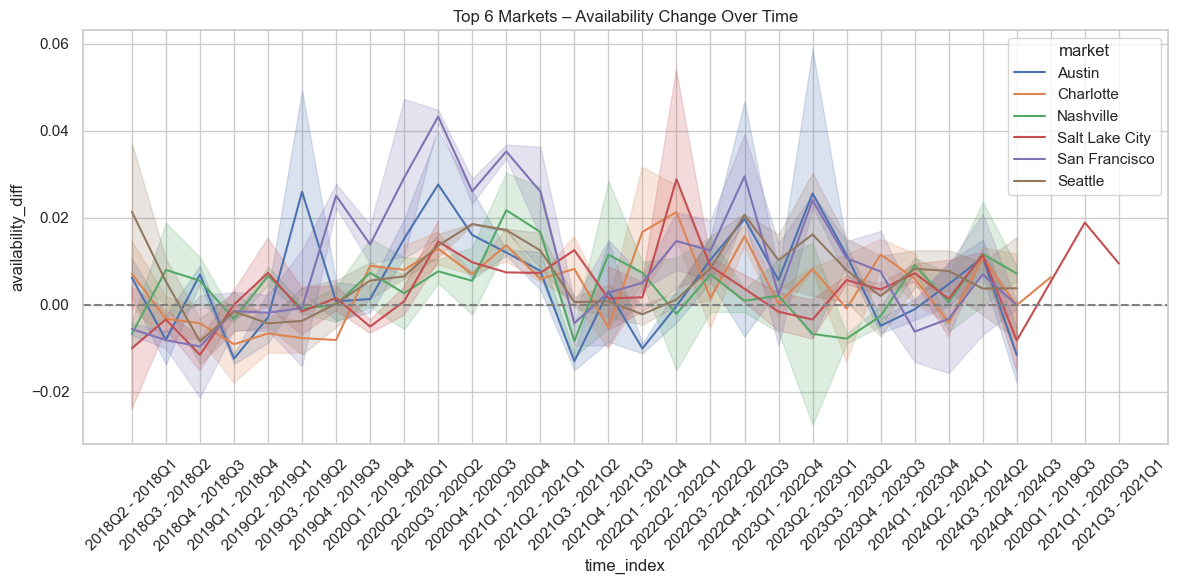

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only a few markets (top 6 with highest total availability_diff change)
top_markets = diff_df.groupby('market')['availability_diff'].mean().sort_values(ascending=False).head(6).index
plot_df = diff_df[diff_df['market'].isin(top_markets)]

# Plot availability_diff over time by market
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_df, x='time_index', y='availability_diff', hue='market')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Top 6 Markets – Availability Change Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/3414280821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_trend, x='year', y='availability_diff', palette='coolwarm')


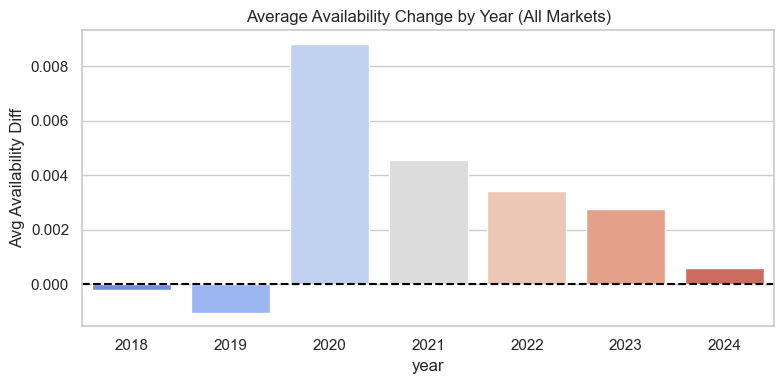

In [356]:
# Extract year from 'time_index' if not already in your data
diff_df['year'] = diff_df['current_year']

yearly_trend = diff_df.groupby(['year'])['availability_diff'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=yearly_trend, x='year', y='availability_diff', palette='coolwarm')
plt.title("Average Availability Change by Year (All Markets)")
plt.ylabel("Avg Availability Diff")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


In [357]:
diff_df.columns

Index(['market', 'internal_class', 'current_year', 'current_quarter',
       'previous_year', 'previous_quarter', 'current_avail', 'previous_avail',
       'availability_diff', 'time_index', 'year'],
      dtype='object')

/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/3020626724.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leases_df['state'] = leases_df['market'].map(cities_to_state)


  state   market internal_class  year quarter time_index  difference  \
0    AZ  Phoenix              A  2018      Q2    2018-Q2    0.016586   
1    AZ  Phoenix              A  2018      Q2    2018-Q2    0.016586   
2    AZ  Phoenix              A  2018      Q2    2018-Q2    0.016586   
3    AZ  Phoenix              A  2018      Q3    2018-Q3    0.013740   
4    AZ  Phoenix              A  2018      Q3    2018-Q3    0.013740   

   availability_proportion  overall_rent  month  unemployment_rate  
0                 0.186043     26.231819      4                4.7  
1                 0.186043     26.231819      5                4.7  
2                 0.186043     26.231819      6                4.7  
3                 0.199783     26.816695      7                4.7  
4                 0.199783     26.816695      8                4.7  


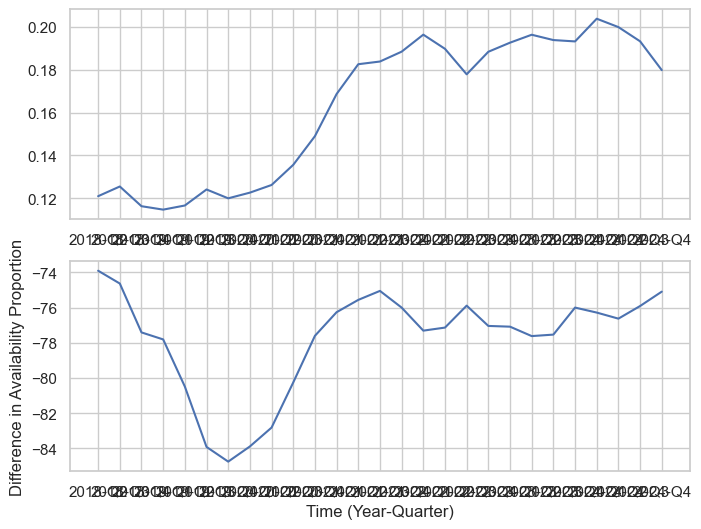

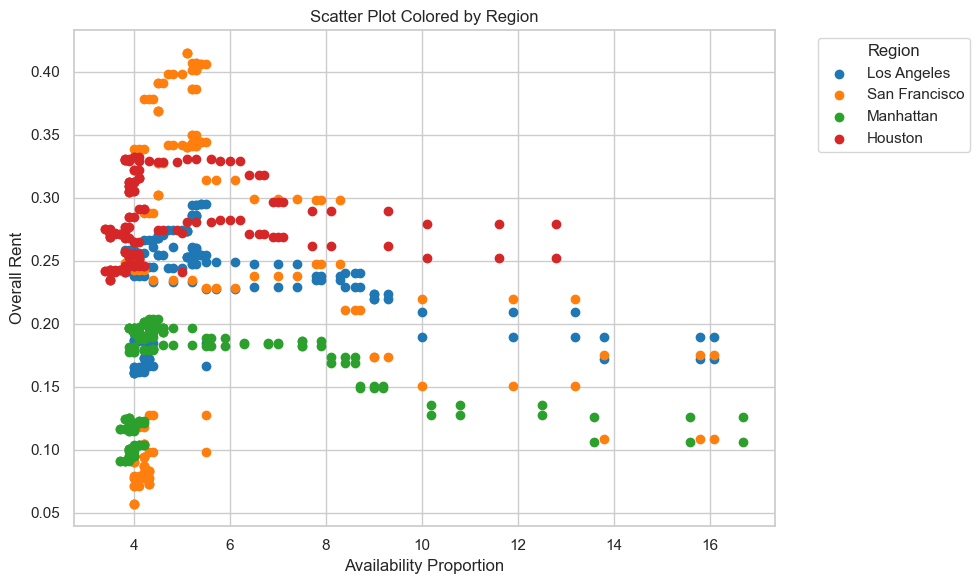

In [566]:


cities_to_state = {
    'Atlanta' : 'GA',
    'Austin' : 'TX',
    'Baltimore' : 'MD',
    'Boston' : 'MA',
    'Charlotte' : 'NC',
    'Chicago' : 'IL',
    'Chicago Suburbs' : 'IL',
    'Dallas/Ft Worth' : 'TX',
    'Denver' : 'CO',
    'Detroit' : 'MI',
    'Houston' : 'TX',
    'Los Angeles':'CA',
    'Manhattan':'NY',
    'Nashville': 'TN',
    'Northern New Jersey' : 'NJ',
    'Northern Virginia' : 'VA', 
    'Orange County' : 'CA',
    'Philadelphia' : 'PA',
    'Phoenix' : 'AZ',
    'Raleigh/Durham' : 'NC',
    'Salt Lake City' : 'UT',
    'San Diego' : 'CA',
    'San Francisco' : 'CA',
    'Seattle' : 'WA',
    'South Bay/San Jose' : 'CA',
    'South Florida' : 'FL',
    'Southern Maryland' : 'MD',
    'Tampa' : 'FL',
    'Washington D.C' : 'MD'
}

leases_df['state'] = leases_df['market'].map(cities_to_state)

RBA = leases_df.dropna(subset=['availability_proportion'])

# Group the data by market, internal_class (O/A), year, and quarter
df_grouped = RBA.groupby(['state', 'market', 'internal_class', 'year', 'quarter']).agg({
    'availability_proportion': 'mean',
    'overall_rent' : 'mean'
}).reset_index()

# Sort the data to ensure proper order for calculating differences
df_grouped = df_grouped.sort_values(by=['state','market', 'internal_class', 'year', 'quarter'])

# Initialize an empty list to store the differences
differences = []

# Iterate over each market and internal_class (O/A)
for (state, market, internal_class), group in df_grouped.groupby(['state','market', 'internal_class']):
    group = group.reset_index(drop=True)  # Reset index for easier iteration
    for i in range(1, len(group)):  # Start from the second row to calculate differences
        diff = group.loc[i, 'availability_proportion'] - group.loc[i - 1, 'availability_proportion']
        differences.append({
            'state' : state,
            'market': market,
            'internal_class': internal_class,
            'year': group.loc[i, 'year'],
            'quarter': group.loc[i, 'quarter'],
            'time_index': f"{group.loc[i, 'year']}-{group.loc[i, 'quarter']}",  # Combine year and quarter
            'difference': diff,
            'availability_proportion': group.loc[i, 'availability_proportion'],
            'overall_rent': group.loc[i, 'overall_rent']

        })

# Convert the differences list into a DataFrame for easier analysis
differences_df = pd.DataFrame(differences)

dfUnemployement.rename(columns={'Year': 'year', 'Quarter': 'quarter'}, inplace=True)

unemployment_df = dfUnemployement.groupby(['state','year','quarter']).agg({'unemployment_rate':'mean'}).reset_index()


merged = differences_df.merge(
    dfUnemployement,  # Select relevant columns
    on=['state', 'year', 'quarter'],  # Merge keys
    how='left'  # Use 'left' join to keep all rows in differences_df
)

print(merged.head())

# Set the 'time_index' as the index for easier plotting
#differences_df.set_index('time_index', inplace=True)

ready2graph = differences_df[(differences_df['market'] == 'Manhattan') & (differences_df['internal_class'] == 'A')]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6)) # 2 rows, 1 column

axes[0].plot(ready2graph.time_index, ready2graph.availability_proportion, label='Availability Proporiton')
axes[1].plot(ready2graph.time_index, -ready2graph.overall_rent, label='rent')

plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Difference in Availability Proportion')
plt.show()

ready2graph = merged[merged['market'].isin(['Manhattan', 'Los Angeles', 'San Francisco', 'Houston'])]

regions = ready2graph['market']  # Replace 'State' with your region column if different
unique_regions = regions.unique()
colors = {region: plt.cm.tab10(i) for i, region in enumerate(unique_regions)}  # Assign colors to regions

plt.figure(figsize=(10, 6))
for region in unique_regions:
    subset = ready2graph[ready2graph['market'] == region]
    plt.scatter(
        subset['unemployment_rate'], 
        subset['availability_proportion'], 
        label=region, 
        color=colors[region]
    )

plt.xlabel('Availability Proportion')
plt.ylabel('Overall Rent')
plt.title('Scatter Plot Colored by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [359]:
merged.columns

Index(['state', 'market', 'internal_class', 'year', 'quarter', 'time_index',
       'difference', 'availability_proportion', 'overall_rent', 'month',
       'unemployment_rate'],
      dtype='object')

In [360]:
manhattan = merged[(merged['market'] == 'Manhattan')]


In [361]:
manhattan.head()

,state,market,internal_class,year,quarter,time_index,difference,availability_proportion,overall_rent,month,unemployment_rate
1911,NY,Manhattan,A,2018,Q2,2018-Q2,-0.003117,0.120953,73.904220,4,4.2
1912,NY,Manhattan,A,2018,Q2,2018-Q2,-0.003117,0.120953,73.904220,5,4.1
1913,NY,Manhattan,A,2018,Q2,2018-Q2,-0.003117,0.120953,73.904220,6,4.0
1914,NY,Manhattan,A,2018,Q3,2018-Q3,0.004526,0.125479,74.632086,7,3.9
1915,NY,Manhattan,A,2018,Q3,2018-Q3,0.004526,0.125479,74.632086,8,3.9


Text(0, 0.5, 'unemployment_rate')

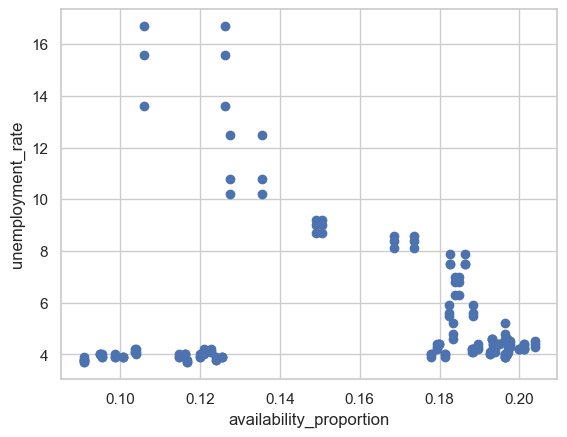

In [362]:
plt.scatter(x=manhattan['availability_proportion'], y=manhattan['unemployment_rate'])
plt.xlabel('availability_proportion')
plt.ylabel('unemployment_rate')

In [363]:
merged.columns

Index(['state', 'market', 'internal_class', 'year', 'quarter', 'time_index',
       'difference', 'availability_proportion', 'overall_rent', 'month',
       'unemployment_rate'],
      dtype='object')

In [364]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
# Replace df with your actual DataFrame name
features = ['overall_rent', 'unemployment_rate', 'availability_proportion']
X = merged[features].dropna()  # Drop rows with missing values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


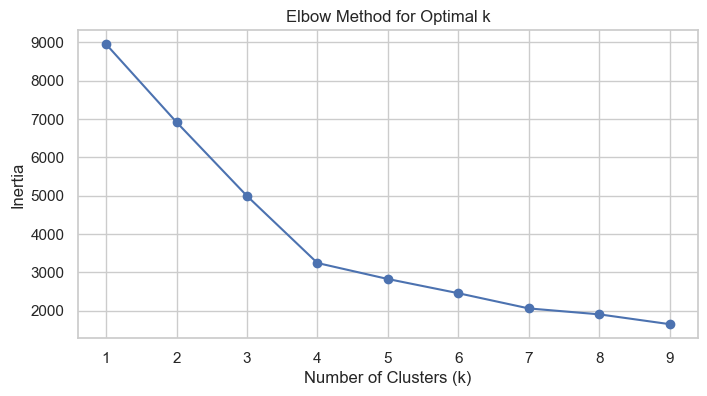

In [366]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [367]:
k = 3  # Replace with your chosen number
kmeans = KMeans(n_clusters=k, random_state=42)
merged['cluster'] = kmeans.fit_predict(X_scaled)


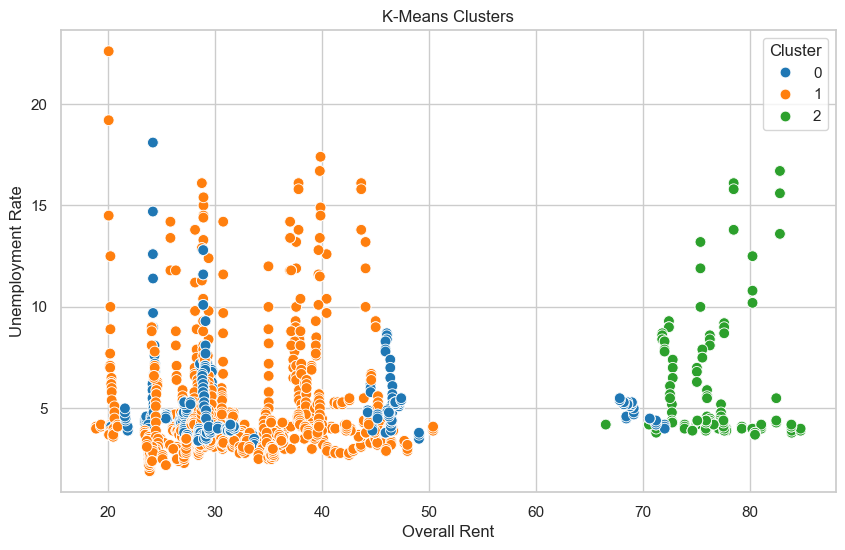

In [368]:
# Plot clusters using the first two variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='overall_rent', y='unemployment_rate', hue='cluster',
    data=merged, palette='tab10', s=60
)
plt.title('K-Means Clusters')
plt.xlabel('Overall Rent')
plt.ylabel('Unemployment Rate')
plt.legend(title='Cluster')
plt.show()


In [369]:
cluster_summary = merged.groupby('cluster')[features].mean()
print(cluster_summary)

         overall_rent  unemployment_rate  availability_proportion
cluster                                                          
0           34.875965           4.554762                 0.278448
1           32.393693           4.713231                 0.178261
2           76.569705           5.717829                 0.161711


In [370]:
leases_df.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing'],
      dtype='object')

/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/3606741137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leases_df['year_quarter'] = leases_df['year'].astype(str) + '-Q' + leases_df['quarter'].astype(str)


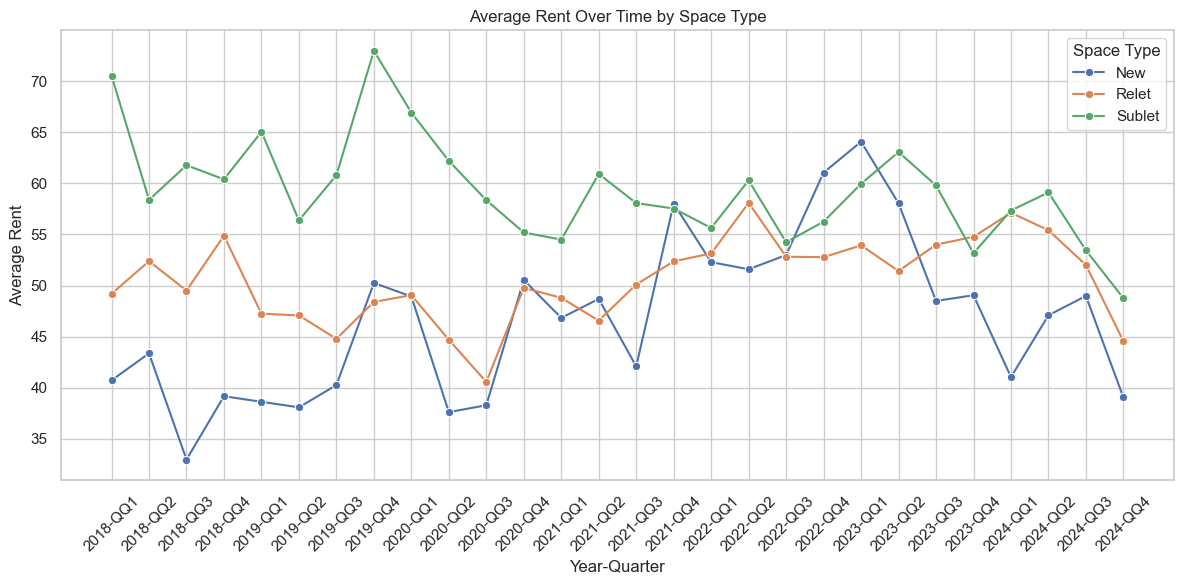

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a combined quarter string like '2023-Q1'
leases_df['year_quarter'] = leases_df['year'].astype(str) + '-Q' + leases_df['quarter'].astype(str)

# Step 2: Group by that and space_type
grouped = leases_df.groupby(['year_quarter', 'space_type'])['overall_rent'].mean().reset_index()

# Step 3: Sort year_quarter to ensure proper order
grouped['year_quarter'] = pd.Categorical(grouped['year_quarter'], 
                                         categories=sorted(leases_df['year_quarter'].unique(), key=lambda x: (int(x[:4]), int(x[-1]))),
                                         ordered=True)

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_quarter', y='overall_rent', hue='space_type', marker='o')
plt.title('Average Rent Over Time by Space Type')
plt.xlabel('Year-Quarter')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.legend(title='Space Type')
plt.tight_layout()
plt.show()


In [372]:
SF = leases_df[leases_df['market'] == 'San Francisco']

/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/4264537118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF['year_quarter'] = SF['year'].astype(str) + '-Q' + SF['quarter'].astype(str)


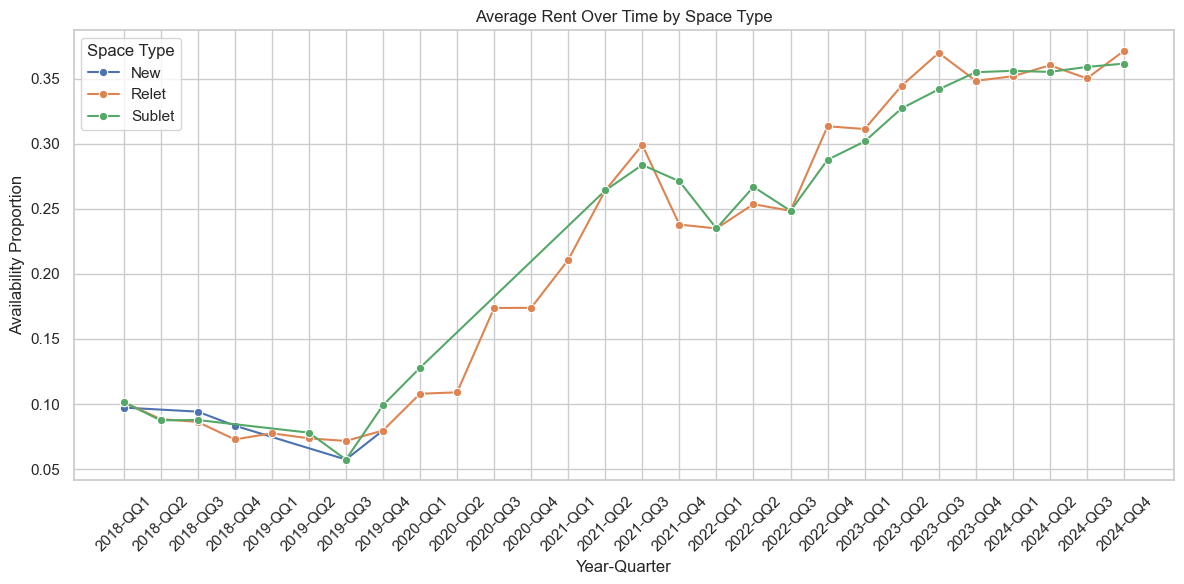

In [373]:

# Step 1: Create a combined quarter string like '2023-Q1'
SF['year_quarter'] = SF['year'].astype(str) + '-Q' + SF['quarter'].astype(str)

# Step 2: Group by that and space_type
grouped = SF.groupby(['year_quarter', 'space_type'])['availability_proportion'].mean().reset_index()

# Step 3: Sort year_quarter to ensure proper order
grouped['year_quarter'] = pd.Categorical(grouped['year_quarter'], 
                                         categories=sorted(SF['year_quarter'].unique(), key=lambda x: (int(x[:4]), int(x[-1]))),
                                         ordered=True)

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year_quarter', y='availability_proportion', hue='space_type', marker='o')
plt.title('Average Rent Over Time by Space Type')
plt.xlabel('Year-Quarter')
plt.ylabel('Availability Proportion')
plt.xticks(rotation=45)
plt.legend(title='Space Type')
plt.tight_layout()
plt.show()


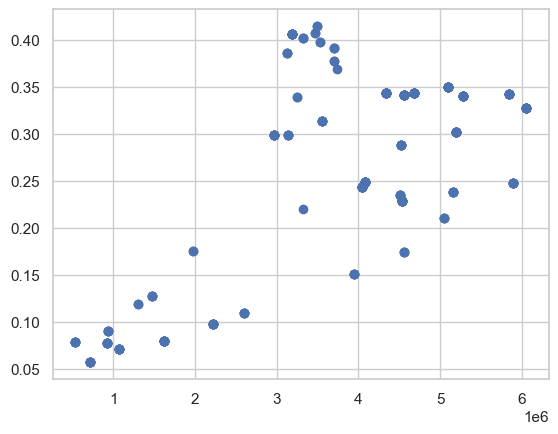

In [374]:
plt.scatter(x=SF['sublet_available_space'], y=SF['availability_proportion'])

In [375]:
print(merged.head())

  state   market internal_class  year quarter time_index  difference  \
0    AZ  Phoenix              A  2018      Q2    2018-Q2    0.016586   
1    AZ  Phoenix              A  2018      Q2    2018-Q2    0.016586   
2    AZ  Phoenix              A  2018      Q2    2018-Q2    0.016586   
3    AZ  Phoenix              A  2018      Q3    2018-Q3    0.013740   
4    AZ  Phoenix              A  2018      Q3    2018-Q3    0.013740   

   availability_proportion  overall_rent  month  unemployment_rate  cluster  
0                 0.186043     26.231819      4                4.7        1  
1                 0.186043     26.231819      5                4.7        1  
2                 0.186043     26.231819      6                4.7        1  
3                 0.199783     26.816695      7                4.7        1  
4                 0.199783     26.816695      8                4.7        1  


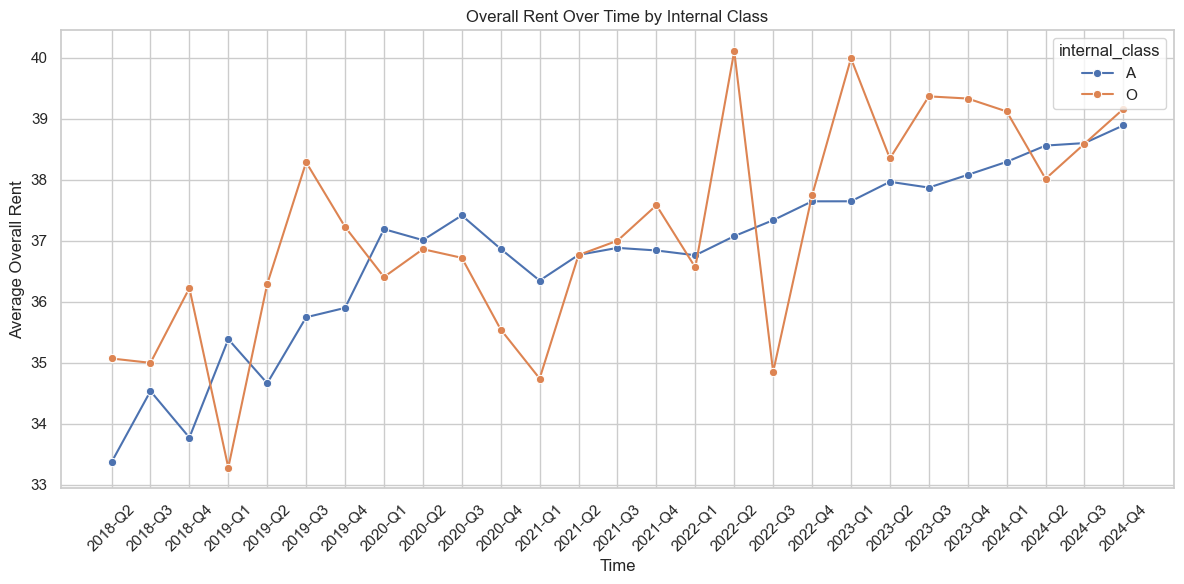

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by time index (e.g., quarter) and internal_class (if you want)
grouped = merged.groupby(['time_index', 'internal_class'])['overall_rent'].mean().reset_index()

# Optional: make sure the time_index is ordered correctly
grouped['time_index'] = pd.Categorical(grouped['time_index'],
                                       categories=sorted(merged['time_index'].unique(), key=lambda x: (int(x[:4]), int(x[-1]))),
                                       ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='time_index', y='overall_rent', hue='internal_class', marker='o')
plt.title('Overall Rent Over Time by Internal Class')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Overall Rent')
plt.tight_layout()
plt.show()


In [377]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
features = ['overall_rent', 'unemployment_rate', 'difference']
X = merged[features]
y = merged['availability_proportion']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
model.coef_


RMSE: 0.061126191658431514


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


array([-5.25413879e-04, -1.26239234e-03,  7.09678692e-01])

In [378]:
merged.columns

Index(['state', 'market', 'internal_class', 'year', 'quarter', 'time_index',
       'difference', 'availability_proportion', 'overall_rent', 'month',
       'unemployment_rate', 'cluster'],
      dtype='object')

In [379]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

markets = merged['market'].unique()
market_results = {}

for mkt in markets:
    df_mkt = merged[merged['market'] == mkt]
    X = df_mkt[['overall_rent', 'unemployment_rate', 'difference']]
    y = df_mkt['availability_proportion']
    
    # Skip if too few samples
    if len(df_mkt) < 30:
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    market_results[mkt] = {
        'rmse': rmse,
        'coef': model.coef_,
        'intercept': model.intercept_
    }

# View results
for mkt, res in market_results.items():
    print(f"\nMarket: {mkt}")
    print("  RMSE:", round(res['rmse'], 4))
    print("  Coefficients:", res['coef'])
    print("  Intercept:", res['intercept'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg


Market: Phoenix
  RMSE: 0.0424
  Coefficients: [ 0.02837996 -0.00937835  2.11668797]
  Intercept: -0.5366626558697213

Market: Los Angeles
  RMSE: 0.0224
  Coefficients: [ 0.01044947 -0.00380704  0.11798601]
  Intercept: -0.214661183104213

Market: San Diego
  RMSE: 0.0329
  Coefficients: [ 7.95501470e-03 -1.15529778e-03  1.36790737e+00]
  Intercept: -0.10552958339662269

Market: San Francisco
  RMSE: 0.0867
  Coefficients: [-1.87752485e-02 -1.59873400e-03  1.67821818e+00]
  Intercept: 1.5907614764951519

Market: South Florida
  RMSE: 0.026
  Coefficients: [ 1.19411945e-03 -2.41445706e-05  6.28869781e-01]
  Intercept: 0.13819113670688576

Market: Tampa
  RMSE: 0.0263
  Coefficients: [ 0.01379367 -0.00128106  0.67015636]
  Intercept: -0.18762484590219114

Market: Atlanta
  RMSE: 0.0411
  Coefficients: [ 0.01250758 -0.00561008  1.384761  ]
  Intercept: -0.11614857164527162

Market: Chicago Suburbs
  RMSE: 0.0282
  Coefficients: [ 1.30639336e-02 -6.99639249e-04  9.19260678e-01]
  Interce

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg

In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

markets = merged['market'].unique()
market_results = {}

for mkt in markets:
    df_mkt = merged[merged['market'] == mkt]
    X = df_mkt[['overall_rent', 'unemployment_rate', 'availability_proportion']]
    y = df_mkt['difference']
    
    # Skip if too few samples
    if len(df_mkt) < 30:
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    market_results[mkt] = {
        'rmse': rmse,
        'coef': model.coef_,
        'intercept': model.intercept_
    }

# View results
for mkt, res in market_results.items():
    print(f"\nMarket: {mkt}")
    print("  RMSE:", round(res['rmse'], 4))
    print("  Coefficients:", res['coef'])
    print("  Intercept:", res['intercept'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg


Market: Phoenix
  RMSE: 0.0101
  Coefficients: [-0.00465283  0.00231247  0.11853464]
  Intercept: 0.09714410886972503

Market: Los Angeles
  RMSE: 0.0079
  Coefficients: [0.00072026 0.00127685 0.02657727]
  Intercept: -0.04267393203870985

Market: San Diego
  RMSE: 0.0098
  Coefficients: [-0.00152799  0.00076224  0.12556156]
  Intercept: 0.03173765770968505

Market: San Francisco
  RMSE: 0.0146
  Coefficients: [0.00150962 0.00308584 0.07046716]
  Intercept: -0.13306358017800884

Market: South Florida
  RMSE: 0.0069
  Coefficients: [-0.00043544  0.0006322   0.04739536]
  Intercept: 0.005751366337735347

Market: Tampa
  RMSE: 0.0101
  Coefficients: [-0.00052964  0.0008912   0.05223045]
  Intercept: 0.0031761961592013744

Market: Atlanta
  RMSE: 0.0105
  Coefficients: [-1.49474827e-05  1.71743557e-03  5.55870731e-02]
  Intercept: -0.016766875920289408

Market: Chicago Suburbs
  RMSE: 0.0117
  Coefficients: [-0.00240466  0.00090924  0.10046701]
  Intercept: 0.027183329740811394

Market: B

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg

In [381]:
merged

,state,market,internal_class,year,quarter,time_index,difference,availability_proportion,overall_rent,month,unemployment_rate,cluster
0,AZ,Phoenix,A,2018,Q2,2018-Q2,0.016586,0.186043,26.231819,4,4.7,1
1,AZ,Phoenix,A,2018,Q2,2018-Q2,0.016586,0.186043,26.231819,5,4.7,1
2,AZ,Phoenix,A,2018,Q2,2018-Q2,0.016586,0.186043,26.231819,6,4.7,1
3,AZ,Phoenix,A,2018,Q3,2018-Q3,0.013740,0.199783,26.816695,7,4.7,1
4,AZ,Phoenix,A,2018,Q3,2018-Q3,0.013740,0.199783,26.816695,8,4.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2980,WA,Seattle,O,2024,Q3,2024-Q3,0.000661,0.249828,44.277290,8,4.8,0
2981,WA,Seattle,O,2024,Q3,2024-Q3,0.000661,0.249828,44.277290,9,4.8,0
2982,WA,Seattle,O,2024,Q4,2024-Q4,-0.008062,0.241766,45.200000,10,4.7,0
2983,WA,Seattle,O,2024,Q4,2024-Q4,-0.008062,0.241766,45.200000,11,4.6,0


In [382]:
merged.columns

Index(['state', 'market', 'internal_class', 'year', 'quarter', 'time_index',
       'difference', 'availability_proportion', 'overall_rent', 'month',
       'unemployment_rate', 'cluster'],
      dtype='object')

In [403]:
mean_availability = merged['availability_proportion'].mean()



In [389]:
mean_availability

0.20925273388373322

In [405]:
merged['availability_proportion']

0       0.186043
1       0.186043
2       0.186043
3       0.199783
4       0.199783
          ...   
2980    0.249828
2981    0.249828
2982    0.241766
2983    0.241766
2984    0.241766
Name: availability_proportion, Length: 2985, dtype: float64

In [412]:
# Calculate the mean and standard deviation for availability
mean_availability = merged['availability_proportion'].mean()
std_availability = merged['availability_proportion'].std()

# Set thresholds for high and low availability
high_availability_threshold = mean_availability + std_availability
low_availability_threshold = mean_availability - std_availability

# Filter for markets with high availability (availability_proportion > high_availability_threshold)
filtered_out = merged[merged['availability_proportion'] > high_availability_threshold]

# Filter for markets with low availability (availability_proportion < low_availability_threshold)
filtered_in = merged[merged['availability_proportion'] < low_availability_threshold]

# Display unique markets for both filtered datasets
print("Markets with High Availability (filtered_out):", filtered_out['market'].unique())
print("Markets with Low Availability (filtered_in):", filtered_in['market'].unique())


Markets with High Availability (filtered_out): ['Phoenix' 'Los Angeles' 'San Diego' 'San Francisco' 'Atlanta'
 'Chicago Suburbs' 'Detroit' 'Charlotte' 'Northern New Jersey'
 'Philadelphia' 'Nashville' 'Austin' 'Houston' 'Northern Virginia'
 'Seattle']
Markets with Low Availability (filtered_in): ['San Diego' 'San Francisco' 'Tampa' 'Boston' 'Baltimore' 'Charlotte'
 'Northern New Jersey' 'Manhattan' 'Nashville' 'Austin' 'Salt Lake City'
 'Seattle']


In [413]:
low_availability_markets = ['San Diego', 'San Francisco', 'Tampa', 'Boston', 'Baltimore', 
                            'Charlotte', 'Northern New Jersey', 'Manhattan', 'Nashville', 
                            'Austin', 'Salt Lake City', 'Seattle']


In [417]:
# Sort by market and availability_proportion
sorted_df = merged.sort_values(by=['market', 'availability_proportion'], ascending=False)


sorted_df

,state,market,internal_class,year,quarter,time_index,difference,availability_proportion,overall_rent,month,unemployment_rate,cluster
831,FL,Tampa,A,2024,Q2,2024-Q2,0.005584,0.251298,29.633463,4,3.3,0
832,FL,Tampa,A,2024,Q2,2024-Q2,0.005584,0.251298,29.633463,5,3.3,0
833,FL,Tampa,A,2024,Q2,2024-Q2,0.005584,0.251298,29.633463,6,3.3,0
834,FL,Tampa,A,2024,Q3,2024-Q3,-0.001480,0.249818,30.204041,7,3.3,0
835,FL,Tampa,A,2024,Q3,2024-Q3,-0.001480,0.249818,30.204041,8,3.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,GA,Atlanta,O,2019,Q3,2019-Q3,0.002146,0.173123,27.221762,8,3.5,1
1019,GA,Atlanta,O,2019,Q3,2019-Q3,0.002146,0.173123,27.221762,9,3.5,1
1014,GA,Atlanta,O,2019,Q2,2019-Q2,-0.011343,0.170976,26.905426,4,3.6,1
1015,GA,Atlanta,O,2019,Q2,2019-Q2,-0.011343,0.170976,26.905426,5,3.6,1


In [418]:
top_increasing = ['Tampa', 'Seattele', 'South Florida']
top_decreasing = ['Atlanta', 'Austin', 'Baltimore']
markets = ['Tampa', 'Seattele', 'South Florida','Atlanta', 'Austin', 'Baltimore' ]

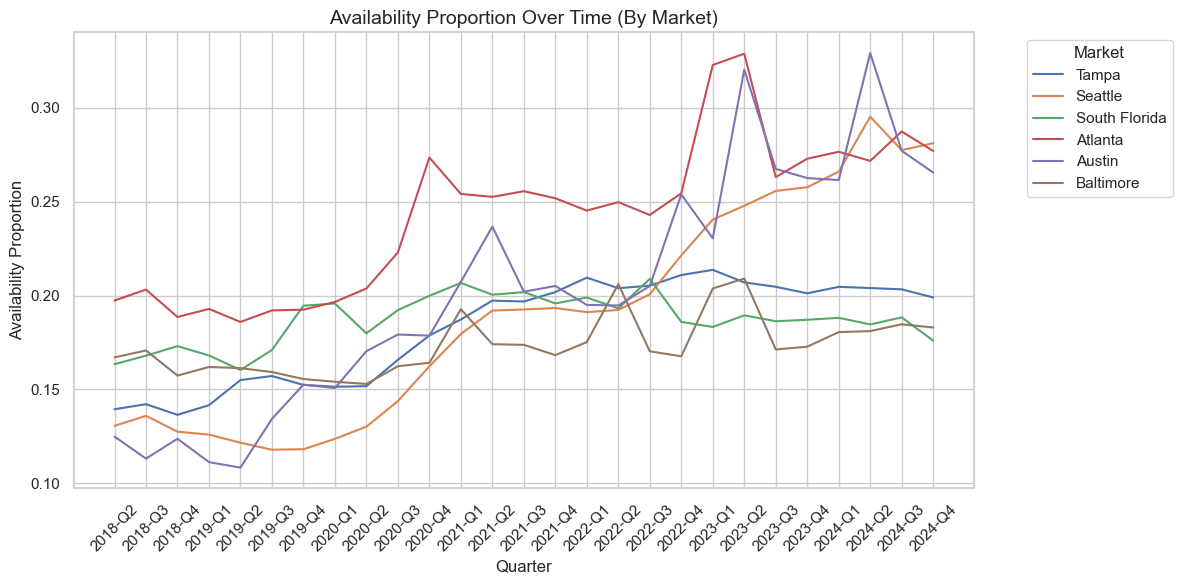

In [420]:

# Define the list of markets to focus on
markets = ['Tampa', 'Seattle', 'South Florida', 'Atlanta', 'Austin', 'Baltimore']

# Filter the data for these markets
filtered_data = merged[merged['market'].isin(markets)]

# Group the data by 'year' and 'time_index' (quarter) and calculate the mean availability_proportion
grouped_data = filtered_data.groupby(['year', 'time_index', 'market'])['availability_proportion'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(12, 6))

# Loop through each market and plot its availability over time
for market in markets:
    market_data = grouped_data[grouped_data['market'] == market]
    plt.plot(market_data['time_index'], market_data['availability_proportion'], label=market)

# Labeling the plot
plt.title('Availability Proportion Over Time (By Market)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Availability Proportion', fontsize=12)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [421]:
merged.columns

Index(['state', 'market', 'internal_class', 'year', 'quarter', 'time_index',
       'difference', 'availability_proportion', 'overall_rent', 'month',
       'unemployment_rate', 'cluster'],
      dtype='object')

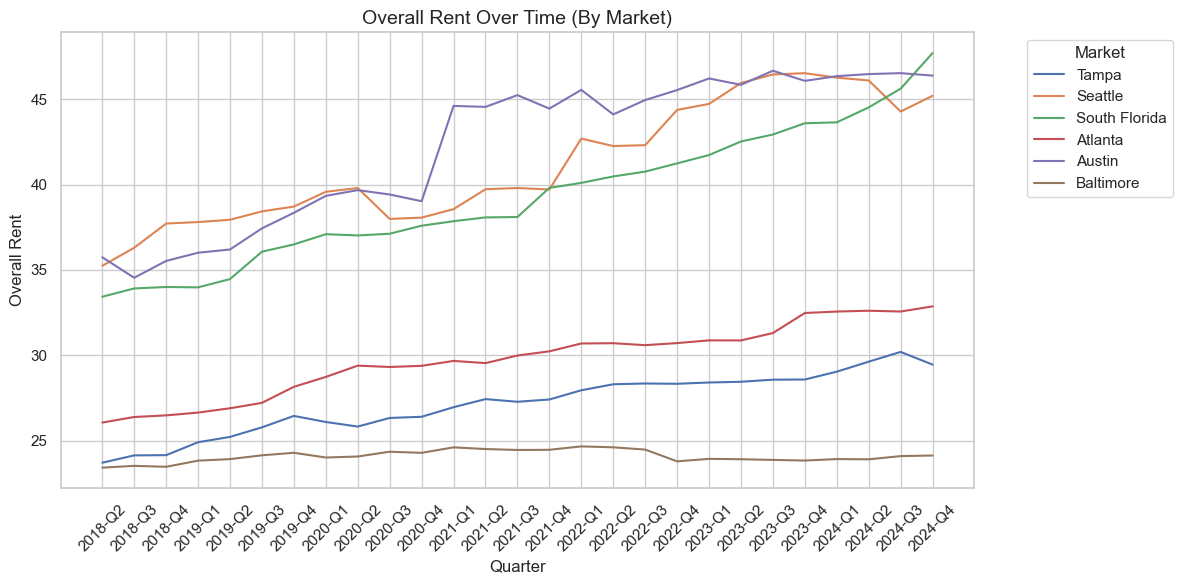

In [422]:

# Define the list of markets to focus on
markets = ['Tampa', 'Seattle', 'South Florida', 'Atlanta', 'Austin', 'Baltimore']

# Filter the data for these markets
filtered_data = merged[merged['market'].isin(markets)]

# Group the data by 'year' and 'time_index' (quarter) and calculate the mean availability_proportion
grouped_data = filtered_data.groupby(['year', 'time_index', 'market'])['overall_rent'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(12, 6))

# Loop through each market and plot its availability over time
for market in markets:
    market_data = grouped_data[grouped_data['market'] == market]
    plt.plot(market_data['time_index'], market_data['overall_rent'], label=market)

# Labeling the plot
plt.title('Overall Rent Over Time (By Market)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Overall Rent', fontsize=12)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


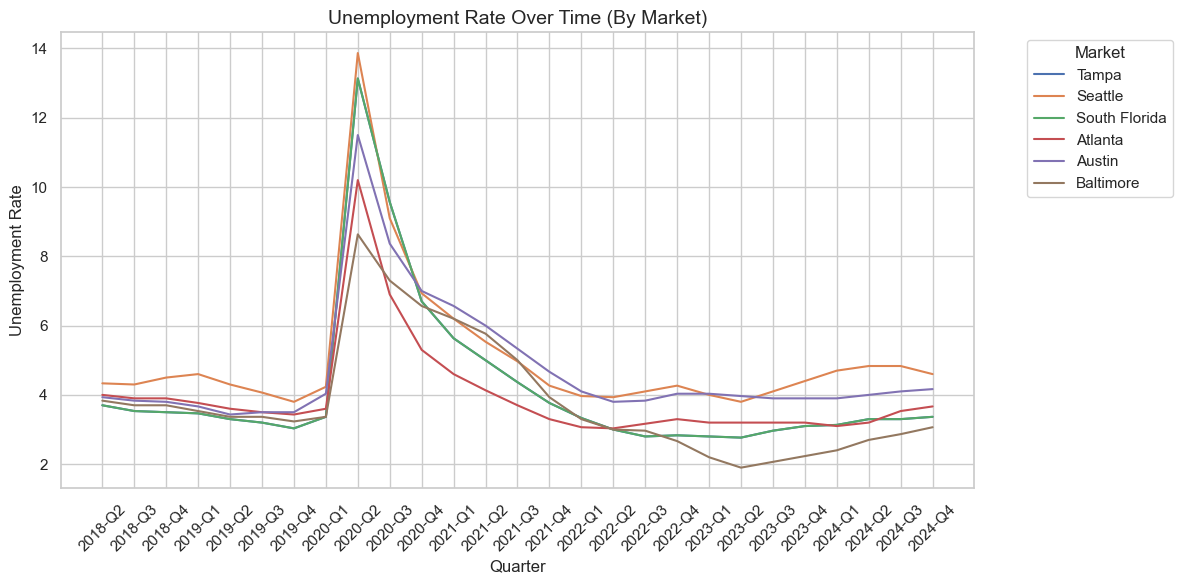

In [423]:

# Define the list of markets to focus on
markets = ['Tampa', 'Seattle', 'South Florida', 'Atlanta', 'Austin', 'Baltimore']

# Filter the data for these markets
filtered_data = merged[merged['market'].isin(markets)]

# Group the data by 'year' and 'time_index' (quarter) and calculate the mean availability_proportion
grouped_data = filtered_data.groupby(['year', 'time_index', 'market'])['unemployment_rate'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(12, 6))

# Loop through each market and plot its availability over time
for market in markets:
    market_data = grouped_data[grouped_data['market'] == market]
    plt.plot(market_data['time_index'], market_data['unemployment_rate'], label=market)

# Labeling the plot
plt.title('Unemployment Rate Over Time (By Market)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


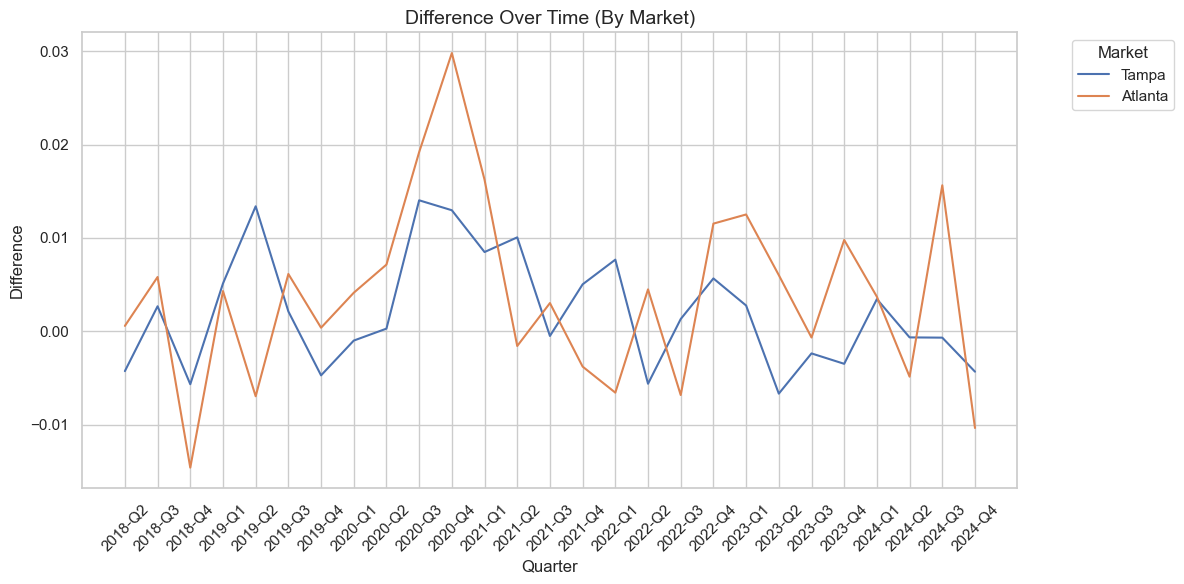

In [425]:

# Define the list of markets to focus on
markets = ['Tampa', 'Atlanta']

# Filter the data for these markets
filtered_data = merged[merged['market'].isin(markets)]

# Group the data by 'year' and 'time_index' (quarter) and calculate the mean availability_proportion
grouped_data = filtered_data.groupby(['year', 'time_index', 'market'])['difference'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(12, 6))

# Loop through each market and plot its availability over time
for market in markets:
    market_data = grouped_data[grouped_data['market'] == market]
    plt.plot(market_data['time_index'], market_data['difference'], label=market)

# Labeling the plot
plt.title('Difference Over Time (By Market)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [496]:
gdp = pd.read_csv("/Users/caterinaponti/Documents/GitHub/sac-datafest-25/gdp.csv", skiprows=3, header=[0, 1])

In [497]:
gdp = gdp.T

In [498]:
gdp

0   \
Line               Line                                           1.0   
Unnamed: 1_level_0 Unnamed: 1_level_1          Gross domestic product   
2018               Q1                                             3.3   
                   Q2                                             2.1   
                   Q3                                             2.5   
                   Q4                                             0.6   
2019               Q1                                             2.5   
                   Q2                                             3.4   
                   Q3                                             4.8   
                   Q4                                             2.8   
2020               Q1                                            -5.5   
                   Q2                                           -28.1   
                   Q3                                            35.2   
                   Q4                                             4.4   
2021               Q1                                             5.6   
                   Q2                                             6.4   
                   Q3                                             3.5   
                   Q4                                             7.4   
2022               Q1                                            -1.0   
                   Q2                                             0.3   
                   Q3                                             2.7   
                   Q4                                             3.4   
2023               Q1                                             2.8   
                   Q2                                             2.4   
                   Q3                                             4.4   
                   Q4                                             3.2   
2024               Q1                                             1.6   
                   Q2                                             3.0   
                   Q3                                             3.1   
                   Q4                                             2.4   

                                                                      1   \
Line               Line                                              2.0   
Unnamed: 1_level_0 Unnamed: 1_level_1  Personal consumption expenditures   
2018               Q1                                                2.9   
                   Q2                                                2.2   
                   Q3                                                1.9   
                   Q4                                                1.3   
2019               Q1                                                0.6   
                   Q2                                                3.5   
                   Q3                                                4.6   
                   Q4                                                2.7   
2020               Q1                                               -6.6   
                   Q2                                              -30.6   
                   Q3                                               41.2   
                   Q4                                                5.8   
2021               Q1                                                9.5   
                   Q2                                               14.1   
                   Q3                                                3.1   
                   Q4                                                4.4   
2022               Q1                                                1.0   
                   Q2                                                2.6   
                   Q3                                                1.5   
                   Q4                                                1.2   
2023               Q1                                  

In [499]:
first_col_df = gdp.iloc[:, [0]]
first_col_df


0
Line               Line                                           1.0
Unnamed: 1_level_0 Unnamed: 1_level_1          Gross domestic product
2018               Q1                                             3.3
                   Q2                                             2.1
                   Q3                                             2.5
                   Q4                                             0.6
2019               Q1                                             2.5
                   Q2                                             3.4
                   Q3                                             4.8
                   Q4                                             2.8
2020               Q1                                            -5.5
                   Q2                                           -28.1
                   Q3                                            35.2
                   Q4                                             4.4
2021               Q1                                             5.6
                   Q2                                             6.4
                   Q3                                             3.5
                   Q4                                             7.4
2022               Q1                                            -1.0
                   Q2                                             0.3
                   Q3                                             2.7
                   Q4                                             3.4
2023               Q1                                             2.8
                   Q2                                             2.4
                   Q3                                             4.4
                   Q4                                             3.2
2024               Q1                                             1.6
                   Q2                                             3.0
                   Q3                                             3.1
                   Q4                                             2.4

In [500]:
# Step 1: Set the second row as header
first_col_df.columns = first_col_df.iloc[1]

first_col_df


('Unnamed: 1_level_0', 'Unnamed: 1_level_1')          Gross domestic product
Line               Line                                                  1.0
Unnamed: 1_level_0 Unnamed: 1_level_1                 Gross domestic product
2018               Q1                                                    3.3
                   Q2                                                    2.1
                   Q3                                                    2.5
                   Q4                                                    0.6
2019               Q1                                                    2.5
                   Q2                                                    3.4
                   Q3                                                    4.8
                   Q4                                                    2.8
2020               Q1                                                   -5.5
                   Q2                                                  -28.1
                   Q3                                                   35.2
                   Q4                                                    4.4
2021               Q1                                                    5.6
                   Q2                                                    6.4
                   Q3                                                    3.5
                   Q4                                                    7.4
2022               Q1                                                   -1.0
                   Q2                                                    0.3
                   Q3                                                    2.7
                   Q4                                                    3.4
2023               Q1                                                    2.8
                   Q2                                                    2.4
                   Q3                                                    4.4
                   Q4                                                    3.2
2024               Q1                                                    1.6
                   Q2                                                    3.0
                   Q3                                                    3.1
                   Q4                                                    2.4

In [501]:
first_col_df = first_col_df[2:]
first_col_df

('Unnamed: 1_level_0', 'Unnamed: 1_level_1')         Gross domestic product
2018 Q1                                                                 3.3
     Q2                                                                 2.1
     Q3                                                                 2.5
     Q4                                                                 0.6
2019 Q1                                                                 2.5
     Q2                                                                 3.4
     Q3                                                                 4.8
     Q4                                                                 2.8
2020 Q1                                                                -5.5
     Q2                                                               -28.1
     Q3                                                                35.2
     Q4                                                                 4.4
2021 Q1                                                                 5.6
     Q2                                                                 6.4
     Q3                                                                 3.5
     Q4                                                                 7.4
2022 Q1                                                                -1.0
     Q2                                                                 0.3
     Q3                                                                 2.7
     Q4                                                                 3.4
2023 Q1                                                                 2.8
     Q2                                                                 2.4
     Q3                                                                 4.4
     Q4                                                                 3.2
2024 Q1                                                                 1.6
     Q2                                                                 3.0
     Q3                                                                 3.1
     Q4                                                                 2.4

In [502]:
print(first_col_df.head())

('Unnamed: 1_level_0', 'Unnamed: 1_level_1')         Gross domestic product
2018 Q1                                                                 3.3
     Q2                                                                 2.1
     Q3                                                                 2.5
     Q4                                                                 0.6
2019 Q1                                                                 2.5


In [509]:
gdp = first_col_df.reset_index()
gdp.columns

Index(['level_0', 'level_1', '        Gross domestic product'], dtype='object', name=('Unnamed: 1_level_0', 'Unnamed: 1_level_1'))

In [511]:
gdp.columns = [' '.join(col).strip() for col in gdp.columns.values]
gdp.columns 


Index(['l   e   v   e   l   _   0', 'l   e   v   e   l   _   1',
       'G   r   o   s   s       d   o   m   e   s   t   i   c       p   r   o   d   u   c   t'],
      dtype='object')

In [518]:
gdp = gdp.rename(columns={gdp.columns[0]: 'year', gdp.columns[1]: 'quarter', gdp.columns[2]: 'Gross Domestic Product'})
gdp.columns


Index(['year', 'quarter', 'Gross Domestic Product'], dtype='object')

In [523]:
merged.columns

Index(['state', 'market', 'internal_class', 'year', 'quarter', 'time_index',
       'difference', 'availability_proportion', 'overall_rent', 'month',
       'unemployment_rate', 'cluster'],
      dtype='object')

In [524]:
# Convert both 'Year' columns to integers
gdp['year'] = gdp['year'].astype(int)
merged['year'] = merged['year'].astype(int)

# Now, merge the two DataFrames
merged_df = pd.merge(gdp, merged, on=['year', 'quarter'], how='inner')

# View the merged DataFrame
merged_df


,year,quarter,Gross Domestic Product,state,market,internal_class,time_index,difference,availability_proportion,overall_rent,month,unemployment_rate,cluster
0,2018,Q2,2.1,AZ,Phoenix,A,2018-Q2,0.016586,0.186043,26.231819,4,4.7,1
1,2018,Q2,2.1,AZ,Phoenix,A,2018-Q2,0.016586,0.186043,26.231819,5,4.7,1
2,2018,Q2,2.1,AZ,Phoenix,A,2018-Q2,0.016586,0.186043,26.231819,6,4.7,1
3,2018,Q2,2.1,AZ,Phoenix,O,2018-Q2,0.006509,0.186367,26.231819,4,4.7,1
4,2018,Q2,2.1,AZ,Phoenix,O,2018-Q2,0.006509,0.186367,26.231819,5,4.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,2024,Q4,2.4,WA,Seattle,A,2024-Q4,0.015588,0.320565,45.200000,11,4.6,0
2981,2024,Q4,2.4,WA,Seattle,A,2024-Q4,0.015588,0.320565,45.200000,12,4.5,0
2982,2024,Q4,2.4,WA,Seattle,O,2024-Q4,-0.008062,0.241766,45.200000,10,4.7,0
2983,2024,Q4,2.4,WA,Seattle,O,2024-Q4,-0.008062,0.241766,45.200000,11,4.6,0


In [525]:
merged_df.columns

Index(['year', 'quarter', 'Gross Domestic Product', 'state', 'market',
       'internal_class', 'time_index', 'difference', 'availability_proportion',
       'overall_rent', 'month', 'unemployment_rate', 'cluster'],
      dtype='object')

In [526]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

markets = merged_df['market'].unique()
market_results = {}

for mkt in markets:
    df_mkt = merged_df[merged_df['market'] == mkt]
    X = df_mkt[['overall_rent', 'unemployment_rate', 'difference', 'Gross Domestic Product' ]]
    y = df_mkt['availability_proportion']
    
    # Skip if too few samples
    if len(df_mkt) < 30:
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    market_results[mkt] = {
        'rmse': rmse,
        'coef': model.coef_,
        'intercept': model.intercept_
    }

# View results
for mkt, res in market_results.items():
    print(f"\nMarket: {mkt}")
    print("  RMSE:", round(res['rmse'], 4))
    print("  Coefficients:", res['coef'])
    print("  Intercept:", res['intercept'])



Market: Phoenix
  RMSE: 0.0421
  Coefficients: [ 2.71516982e-02 -1.01018519e-02  2.55295107e+00 -4.02890530e-04]
  Intercept: -0.5009675096341123

Market: Los Angeles
  RMSE: 0.0206
  Coefficients: [ 0.01089412 -0.00334725 -0.02437666  0.0003564 ]
  Intercept: -0.2395085242646711

Market: San Diego
  RMSE: 0.0308
  Coefficients: [ 7.22181115e-03 -1.36405209e-03  1.22899731e+00  1.86518452e-04]
  Intercept: -0.07677142307838777

Market: San Francisco
  RMSE: 0.0739
  Coefficients: [-1.83947840e-02 -3.93082972e-03  1.99538183e+00 -8.08189929e-04]
  Intercept: 1.5759603389810621

Market: South Florida
  RMSE: 0.0269
  Coefficients: [1.37602875e-03 9.91569986e-04 6.96971329e-01 3.41797222e-04]
  Intercept: 0.1253030512001148

Market: Tampa
  RMSE: 0.0294
  Coefficients: [ 1.35813313e-02 -1.27284802e-03  8.41521452e-01  9.60546941e-05]
  Intercept: -0.18375187643364382

Market: Atlanta
  RMSE: 0.0415
  Coefficients: [ 1.29098957e-02 -5.41358318e-03  1.24698041e+00 -1.25260269e-04]
  Interc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg

In [531]:
SF = merged[merged['market' ] == 'San Francisco']

In [534]:
sf_corr = SF[['availability_proportion', 'overall_rent']].corr()
sf_corr

,availability_proportion,overall_rent
availability_proportion,1.000000,-0.663313
overall_rent,-0.663313,1.000000


In [536]:
markets = merged['market'].unique()

In [ ]:
def calculate_corr(market):
   merged_market = merged[merged['market' ] == market]

   market_corr = merged_market[['availability_proportion', 'overall_rent']].corr()

   print(f'{market}:')
   print(market_corr)
   

In [540]:
for market in markets:
    calculate_corr(market)

Phoenix:
                         availability_proportion  overall_rent
availability_proportion                 1.000000      0.592922
overall_rent                            0.592922      1.000000
Los Angeles:
                         availability_proportion  overall_rent
availability_proportion                 1.000000      0.829571
overall_rent                            0.829571      1.000000
San Diego:
                         availability_proportion  overall_rent
availability_proportion                 1.000000      0.460695
overall_rent                            0.460695      1.000000
San Francisco:
                         availability_proportion  overall_rent
availability_proportion                 1.000000     -0.663313
overall_rent                           -0.663313      1.000000
South Florida:
                         availability_proportion  overall_rent
availability_proportion                 1.000000      0.159848
overall_rent                            0.159848      1

In [542]:
leases_df.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing',
       'year_quarter'],
      dtype='object')

In [554]:
dfLeases.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing'],
      dtype='object')

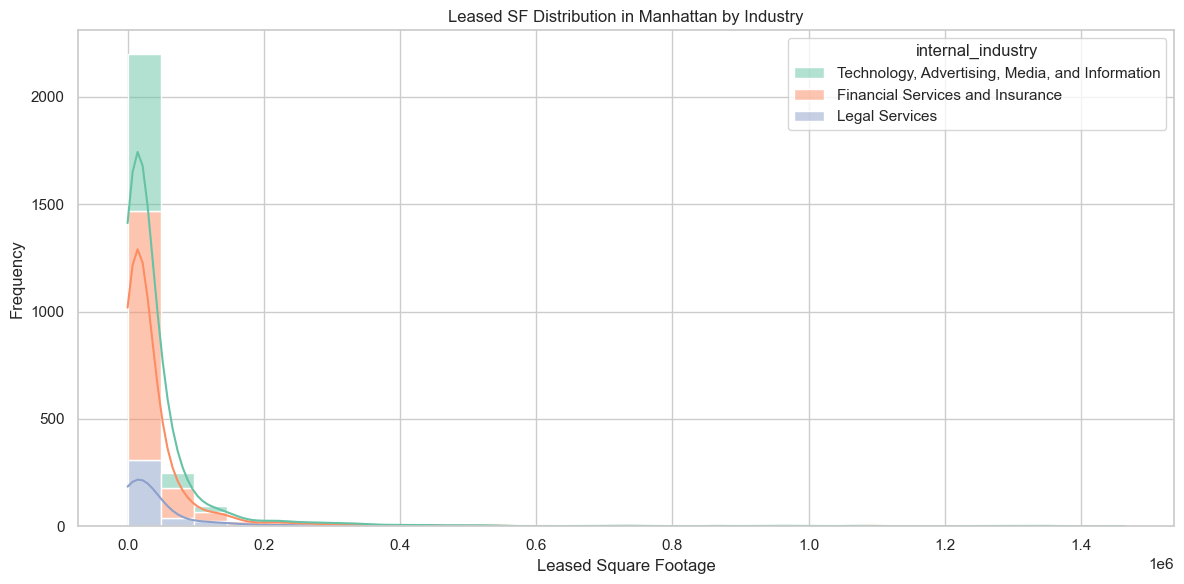

In [557]:
manhattan_df = dfLeases[dfLeases['market'].str.lower() == 'manhattan']


# Define industries of interest
industries = [
    "Financial Services and Insurance",
    "Technology, Advertising, Media, and Information",
    "Legal Services"
]

# Filter for Manhattan and the specified industries
filtered_df = dfLeases[
    (dfLeases['market'].str.lower() == 'manhattan') &
    (dfLeases['internal_industry'].isin(industries))
]

# Plot histograms for each industry
plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_df,
    x='leasedSF',
    hue='internal_industry',
    bins=30,
    kde=True,
    palette='Set2',
    multiple='stack'
)
plt.title('Leased SF Distribution in Manhattan by Industry')
plt.xlabel('Leased Square Footage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/var/folders/g_/l9rmxng52wx2vln3_wdn7nkw0000gn/T/ipykernel_34606/2526397213.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


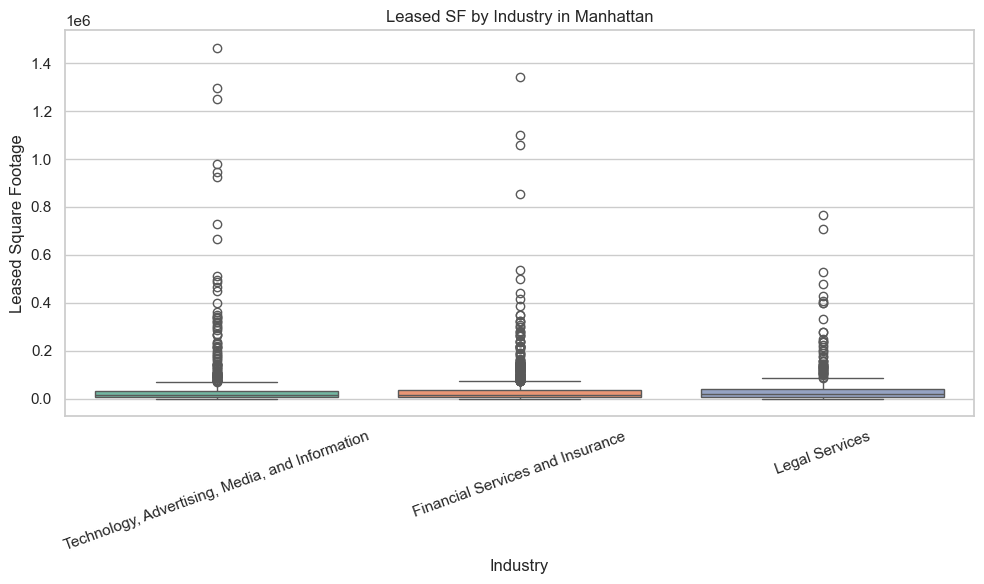

In [558]:
# Filter for Manhattan and specified industries
industries = [
    "Financial Services and Insurance",
    "Technology, Advertising, Media, and Information",
    "Legal Services"
]

filtered_df = dfLeases[
    (dfLeases['market'].str.lower() == 'manhattan') &
    (dfLeases['internal_industry'].isin(industries))
]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered_df,
    x='internal_industry',
    y='leasedSF',
    palette='Set2'
)
plt.title('Leased SF by Industry in Manhattan')
plt.xlabel('Industry')
plt.ylabel('Leased Square Footage')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [559]:
dfLeases.shape

(194685, 35)